In [6]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
df=pd.read_csv('Interview.csv')
df.head()
newdf=df.drop(['Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 26','Unnamed: 27'],axis=1)
newdf.head()
newdf.rename(columns={"Have you obtained the necessary permission to start at the required time":"Start_Permission","Can I Call you three hours before the interview and follow up on your attendance for the interview":"Call_3hrs_before","Candidate Current Location":"Current_Location","Candidate Job Location":"Job_Location","Interview Venue":"Venue","Expected Attendance":"E_attendance","Observed Attendance":"O_attendance","Client name":"Client","Position to be closed":"Closing_Position"},inplace=True)
newdf.rename(columns={"Has the call letter been shared":"Call_Letter_Shared","Interview Type":"I_Type","Hope there will be no unscheduled meetings":"Unscheduled_Meeting","Have you taken a printout of your updated resume. Have you read the JD and understood the same":"Resume_print","Are you clear with the venue details and the landmark.":"Venue_details","Have you obtained the necessary permission to start at the required time":"Start_Permission","Can I Call you three hours before the interview and follow up on your attendance for the interview":"Call_3hrs_before"},inplace=True)
newdf.Client.replace(['Aon Hewitt','Aon hewitt Gurgaon','Hewitt'],'Hewitt',inplace=True)
newdf['Client'].unique()
newdf.Client.replace(['Standard Chartered Bank Chennai','Standard Chartered Bank'],'Standard Chartered bank',inplace=True)
newdf['Client'].unique()
newdf.Industry.replace(['IT Products and Services','IT Services'],'IT',inplace=True)
newdf['Industry'].value_counts()

newdf.Location.replace(['Gurgaonr'],'Gurgaon',inplace=True)
newdf.Location.replace(['chennai','CHENNAI'],inplace=True)
newdf['Location'].value_counts()
newdf.Location.replace(['- Cochin-'],'Cochin',inplace=True)
newdf['Location'].value_counts()
newdf.Current_Location.replace(['CHENNAI','chennai','chennai '],'Chennai',inplace=True)
newdf.Current_Location.replace(['- Cochin- '],'Cochin',inplace=True)
newdf['Current_Location'].unique()
newdf.I_Type.replace(['Scheduled Walkin','Scheduled Walk In'],'Scheduled walkin',inplace=True)
newdf.I_Type.replace(['Walkin '],'Walkin',inplace=True)
newdf['I_Type'].unique()
newdf.I_Type.replace(['Sceduled walkin'],'Scheduled Walkin',inplace=True)
newdf['I_Type'].unique()
newdf.Job_Location.replace(['Visakapatinam'],'Vishakhapatnam',inplace=True)
newdf.Job_Location.replace(['- Cochin- '],'Cochin',inplace=True)
newdf['Job_Location'].unique()
newdf.Venue.replace(['- Cochin- '],'Cochin',inplace=True)
newdf['Venue'].unique()
newdf.Start_Permission.replace(['No','Not yet','Na','NO','Yet to confirm'],'no',inplace=True)
newdf.Start_Permission.replace(['Yes'],'yes',inplace=True)
newdf['Start_Permission'].value_counts()
newdf.Unscheduled_Meeting.replace(['Yes'],'yes',inplace=True)
newdf.Unscheduled_Meeting.replace(['Na','No','Not Sure','Not sure','cant Say'],'no',inplace=True)
newdf['Unscheduled_Meeting'].unique()
newdf.Call_3hrs_before.replace(['No','Na','No Dont'],'no',inplace=True)
newdf.Call_3hrs_before.replace(['Yes'],'yes',inplace=True)
newdf['Call_3hrs_before'].unique()
newdf.Resume_print.replace(['No','No- will take it soon','Not yet','na','Na','Not Yet'],'no',inplace=True)
newdf.Resume_print.replace(['Yes'],'yes',inplace=True)
newdf['Resume_print'].unique()
newdf.Venue_details.replace(['Yes'],'yes',inplace=True)
newdf.Venue_details.replace(['No','No- I need to check','na','Na','no'],'no',inplace=True)
newdf['Venue_details'].unique()
newdf.Call_Letter_Shared.replace(['Yet to Check','Havent Checked','No','Need To Check','Not sure','Yet to Check','Not Sure','Not yet','na','Na'],'no',inplace=True)
newdf.Call_Letter_Shared.replace(['Yes'],'yes',inplace=True)
newdf['Call_Letter_Shared'].unique()
newdf.E_attendance.replace(['11:00 AM', '10.30 Am','Yes'],'yes',inplace=True)
newdf.E_attendance.replace(['No','NO'],'no',inplace=True)
newdf['E_attendance'].unique()
newdf.O_attendance.replace(['No','no ','NO','No '],'no',inplace=True)
newdf.O_attendance.replace(['Yes','yes '],'yes',inplace=True)
newdf['O_attendance'].unique()
newdf.rename(columns={"Date of Interview":"Date","Can I have an alternative number/ desk number. I assure you that I will not trouble you too much":"Alternate_number","Candidate Native location":"Native_Location","Name(Cand ID)":"ID"},inplace=True)
newdf.columns
newdf.shape
newdf.drop(newdf.index[1233],inplace=True)
newdf.Alternate_number.replace(['Yes'],'yes',inplace=True)
newdf.Alternate_number.replace(['No','Na','No I have only thi number','na'],'no',inplace=True)
newdf['O_attendance'].value_counts()
newdf['Start_Permission'].value_counts()

yes    921
no     108
Name: Start_Permission, dtype: int64

In [8]:

#too many diverse data so we drop it
#newdf.drop(['Date'],axis=1,inplace=True)
newdf.isnull().sum()

Date                     0
Client                   0
Industry                 0
Location                 0
Closing_Position         0
Nature of Skillset       0
I_Type                   0
ID                       0
Gender                   0
Current_Location         0
Job_Location             0
Venue                    0
Native_Location          0
Start_Permission       204
Unscheduled_Meeting    247
Call_3hrs_before       247
Alternate_number       247
Resume_print           248
Venue_details          248
Call_Letter_Shared     245
E_attendance             5
O_attendance             0
Marital Status           0
dtype: int64

In [9]:
#missing values treatment or fillup based on countplot

In [10]:
for x in range(1233):
    if pd.isnull(newdf.iloc[x]['E_attendance'])==True:
        newdf.iloc[x]['E_attendance']='Uncertain'
print(newdf['E_attendance'].unique())
newdf['E_attendance'].value_counts()

['yes' 'Uncertain' 'no']


yes          885
Uncertain    255
no            93
Name: E_attendance, dtype: int64

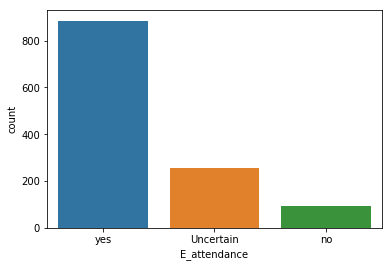

In [11]:
sns.countplot(x='E_attendance',data=newdf)


In [12]:
print(newdf['Start_Permission'].unique())
newdf['Start_Permission'].value_counts()

['yes' nan 'no']


yes    921
no     108
Name: Start_Permission, dtype: int64

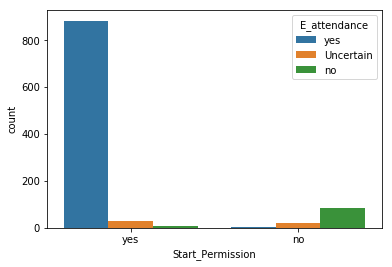

In [13]:
sns.countplot(x='Start_Permission',hue='E_attendance',data=newdf)

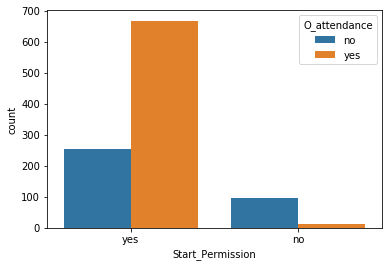

In [14]:
sns.countplot(x='Start_Permission',hue='O_attendance',data=newdf)

In [15]:
#The above plots show that when permission was taken, expected attendance would be higher
#sns.heatmap(newdf.corr(),anode=True):-Use this 

In [16]:
for x in range(1233):
    if pd.isnull(newdf.iloc[x]['Start_Permission'])==True and (newdf.iloc[x]['E_attendance']=='yes' or newdf.iloc[x]['O_attendance']=='yes'):
        newdf.iloc[x]['Start_Permission']='yes'
    else:
        if pd.isnull(newdf.iloc[x]['Start_Permission'])==True:
            newdf.iloc[x]['Start_Permission']='no'
newdf['Start_Permission'].value_counts()

yes    1024
no      209
Name: Start_Permission, dtype: int64

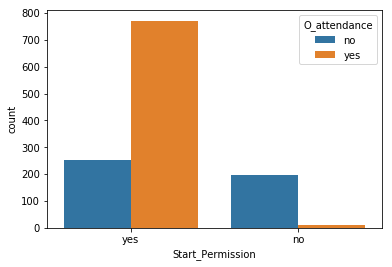

In [17]:
sns.countplot(x='Start_Permission',hue='O_attendance',data=newdf)

In [18]:
print(newdf['Unscheduled_Meeting'].value_counts())
newdf['Unscheduled_Meeting'].isnull().sum()

yes    954
no      32
Name: Unscheduled_Meeting, dtype: int64


247

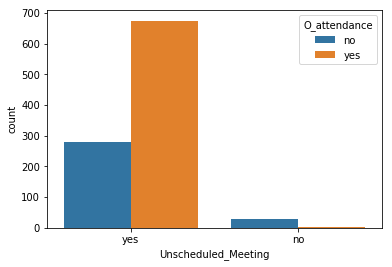

In [19]:
sns.countplot(x='Unscheduled_Meeting',hue='O_attendance',data=newdf)

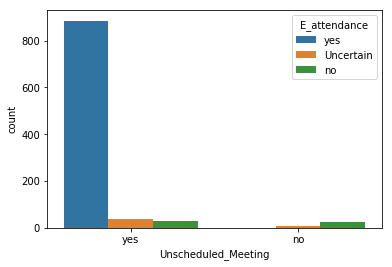

In [20]:
sns.countplot(x='Unscheduled_Meeting',hue='E_attendance',data=newdf)

In [21]:
for x in range(1233):
    if pd.isnull(newdf.iloc[x]['Unscheduled_Meeting'])==True and (newdf.iloc[x]['E_attendance']=='yes' or newdf.iloc[x]['O_attendance']=='yes'):
        newdf.iloc[x]['Unscheduled_Meeting']='yes'
    else:
        if pd.isnull(newdf.iloc[x]['Unscheduled_Meeting'])==True:
            newdf.iloc[x]['Unscheduled_Meeting']='no'
newdf['Unscheduled_Meeting'].value_counts()

yes    1060
no      173
Name: Unscheduled_Meeting, dtype: int64

yes    955
no      31
Name: Call_3hrs_before, dtype: int64


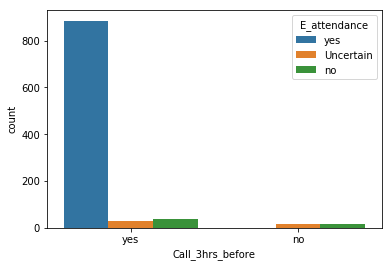

In [22]:
print(newdf['Call_3hrs_before'].value_counts())
sns.countplot(x='Call_3hrs_before',hue='E_attendance',data=newdf)

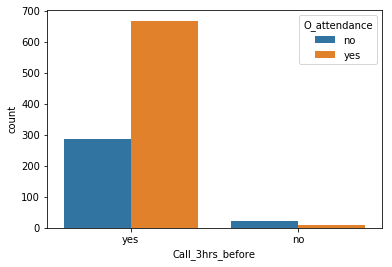

In [23]:
sns.countplot(x='Call_3hrs_before',hue='O_attendance',data=newdf)

In [24]:
for x in range(1233):
    if pd.isnull(newdf.iloc[x]['Call_3hrs_before'])==True and (newdf.iloc[x]['E_attendance']=='yes' or newdf.iloc[x]['O_attendance']=='yes'):
        newdf.iloc[x]['Call_3hrs_before']='yes'
    else:
        if pd.isnull(newdf.iloc[x]['Call_3hrs_before'])==True:
            newdf.iloc[x]['Call_3hrs_before']='no'
newdf['Call_3hrs_before'].value_counts()

yes    1061
no      172
Name: Call_3hrs_before, dtype: int64

In [25]:
newdf['Alternate_number'].value_counts()

yes    937
no      49
Name: Alternate_number, dtype: int64

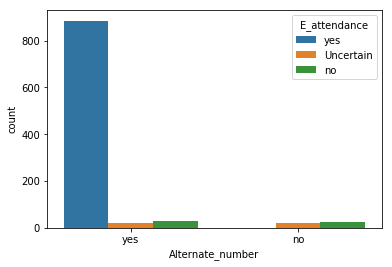

In [26]:
sns.countplot(x='Alternate_number',hue='E_attendance',data=newdf)

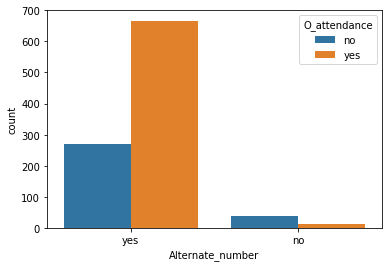

In [27]:
sns.countplot(x='Alternate_number',hue='O_attendance',data=newdf)

In [28]:
for x in range(1233):
    if pd.isnull(newdf.iloc[x]['Alternate_number'])==True and (newdf.iloc[x]['E_attendance']=='yes' or newdf.iloc[x]['O_attendance']=='yes'):
        newdf.iloc[x]['Alternate_number']='yes'
    else:
        if pd.isnull(newdf.iloc[x]['Alternate_number'])==True:
            newdf.iloc[x]['Alternate_number']='no'
newdf['Alternate_number'].value_counts()

yes    1043
no      190
Name: Alternate_number, dtype: int64

In [29]:
print(newdf['Resume_print'].value_counts())
newdf['Resume_print'].isnull().sum()

yes    942
no      43
Name: Resume_print, dtype: int64


248

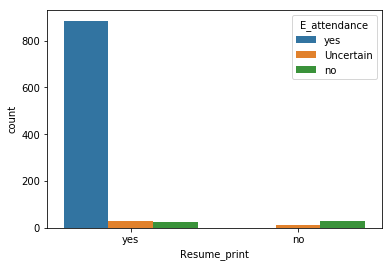

In [30]:
sns.countplot(x='Resume_print',hue='E_attendance',data=newdf)

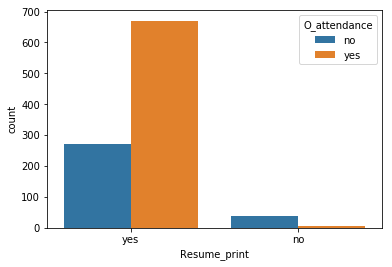

In [31]:
sns.countplot(x='Resume_print',hue='O_attendance',data=newdf)

In [32]:
for x in range(1233):
    if pd.isnull(newdf.iloc[x]['Resume_print'])==True and (newdf.iloc[x]['E_attendance']=='no' or newdf.iloc[x]['O_attendance']=='no'):
        newdf.iloc[x]['Resume_print']='no'
    else:
        if pd.isnull(newdf.iloc[x]['Resume_print'])==True:
            newdf.iloc[x]['Resume_print']='yes'
newdf['Resume_print'].value_counts()

yes    1049
no      184
Name: Resume_print, dtype: int64

In [33]:
newdf['Venue_details'].value_counts()

yes    948
no      37
Name: Venue_details, dtype: int64

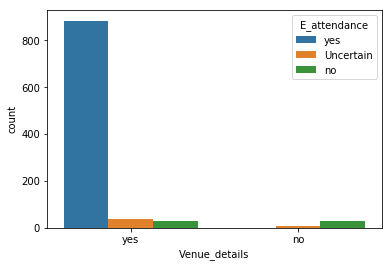

In [34]:
sns.countplot(x='Venue_details',hue='E_attendance',data=newdf)

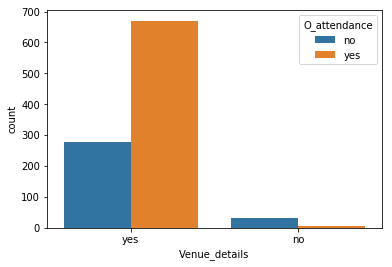

In [35]:
sns.countplot(x='Venue_details',hue='O_attendance',data=newdf)

In [36]:
for x in range(1233):
    if pd.isnull(newdf.iloc[x]['Venue_details'])==True and (newdf.iloc[x]['E_attendance']=='no' or newdf.iloc[x]['E_attendance']=='Uncertain'):
        newdf.iloc[x]['Venue_details']='no'
    else:
        if pd.isnull(newdf.iloc[x]['Venue_details'])==True:
            newdf.iloc[x]['Venue_details']='yes'
newdf['Venue_details'].value_counts()

yes    948
no     285
Name: Venue_details, dtype: int64

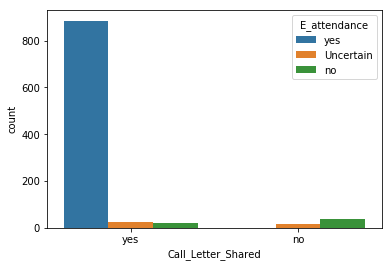

In [37]:
sns.countplot(x='Call_Letter_Shared',hue='E_attendance',data=newdf)

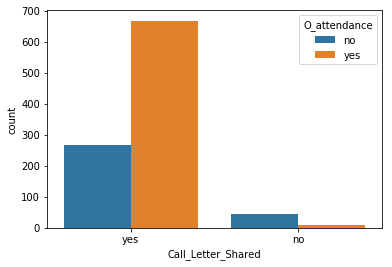

In [38]:
sns.countplot(x='Call_Letter_Shared',hue='O_attendance',data=newdf)

In [39]:
for x in range(1233):
    if pd.isnull(newdf.iloc[x]['Call_Letter_Shared'])==True and ((newdf.iloc[x]['E_attendance']=='no'\
                                                                  or newdf.iloc[x]['E_attendance']=='Uncertain')\
                                                                 or newdf.iloc[x]['O_attendance']=='no'):
        newdf.iloc[x]['Call_Letter_Shared']='no'
    else:
        if pd.isnull(newdf.iloc[x]['Call_Letter_Shared'])==True:
            newdf.iloc[x]['Call_Letter_Shared']='yes'
newdf['Call_Letter_Shared'].value_counts()

yes    934
no     299
Name: Call_Letter_Shared, dtype: int64

In [40]:
newdf["Nature of Skillset"].unique()

array(['Routine', 'Oracle', 'Accounting Operations', 'Banking Operations',
       'Fresher', 'AML/KYC/CDD', 'CDD KYC', 'Biosimiliars', 'RA Label',
       'RA Publishing', 'EMEA', 'LCM -Manager', 'Licensing – RA',
       'generic drugs – RA', 'Biosimilars', 'Regulatory',
       'Analytical R & D', 'Analytical R&D',
       'Senior software engineer-Mednet', 'Tech lead-Mednet',
       'Tech Lead- Mednet', 'Technical Lead', 'Sr Automation Testing',
       'TL', 'Senior Analyst', 'production', 'Production', 'Core Java',
       'Java J2EE', 'Oracle Plsql', 'Java,SQL', 'Automation Testing Java',
       'Submission Management', 'Biosimillar', 'Publishing',
       'Global Labelling', 'ALS Testing', 'Java Developer',
       'Lending and Liabilities', 'Lending & Liability',
       'Lending And Liabilities', 'L & L', 'Banking operations',
       'Lending&Liablities', 'JAVA/J2EE/Struts/Hibernate',
       'JAVA/SPRING/HIBERNATE/JSF', 'Java', 'Java JSF', 'Java,J2ee, JSF',
       'Java ,J2ee', 'Java J

In [41]:
for x in range(1233):
    if newdf.iloc[x]['Nature of Skillset']=='Routine':
        newdf.iloc[x]['Nature of Skillset']='routine'
    else:
        newdf.iloc[x]['Nature of Skillset']='skilled'

In [42]:
newdf["Nature of Skillset"].unique()

array(['routine', 'skilled'], dtype=object)

In [43]:
#All the  columns with their respective unique values:

In [44]:
for x in newdf.columns:
    print(x,":")
    print(newdf[x].unique())
    print()

Date :
['13.02.2015' '19.06.2015' '23.06.2015' '29.06.2015' '25.06.2015'
 '25.05.16' '25.5.2016' '25-05-2016' '25.05.2016' '04-12-2016'
 '13.04.2016' '27.02.2016' '07.05.2016' '5.5.16' '4.5.16' '21.4.16'
 '22.4.16' '23.4.16' '15-Apr-16' '19-Apr-16' '20-Apr-16' '21-Apr-16'
 '22-Apr-16' '25 – Apr-16' '25-Apr-16' '18-Apr-16' '11.5.16' '10.5.16'
 '11.05.16' '12.04.2016' '12.04.2017' '12.04.2018' '12.04.2019'
 '12.04.2020' '12.04.2021' '12.04.2022' '12.04.2023' '8.5.16' '7.5.16'
 '19.03.16' '24.05.2016' '05-11-2016' '26-05-2016' '10.05.2016'
 '28.08.2016 & 09.00 AM' '28.08.2016 & 9.30 AM' '28.8.2016 & 12.00 PM'
 '28.08.2016 & 09.30 AM' '28.8.2016 & 10.30 AM' '28.8.2016 & 09.30 AM'
 '28.8.2016 & 04.00 PM' '28.08.2016 & 11.30 AM' '28.08.2016 & 11.00 AM'
 '28.08.2016 & 10.30 AM' '28.8.2016 & 03.00 PM' '28.08.2016 & 10.00 AM'
 '28.8.2016 & 02.00 PM' '28.8.2016 & 11.00 AM' '13.06.2016' '02.09.2016'
 '02.12.2015' '23.02.2016' '22.03.2016' '26.02.2016' '06.02.2016'
 '21.4.2016' '21-04-2016' '21.4.

In [45]:
#Transfforming variables into numeric form

In [46]:
from sklearn.preprocessing import LabelEncoder as le
x=le()
newdf['client']=x.fit_transform(newdf['Client'])

In [47]:
marr=pd.get_dummies(df['Marital Status'],drop_first=True)

In [48]:
marr.head()

,Single
0,1
1,1
2,1
3,1
4,0


In [49]:
newdf=pd.concat([newdf,marr],axis=1)
newdf.head()

,Date,Client,Industry,Location,Closing_Position,Nature of Skillset,I_Type,ID,Gender,Current_Location,...,Call_3hrs_before,Alternate_number,Resume_print,Venue_details,Call_Letter_Shared,E_attendance,O_attendance,Marital Status,client,Single
0,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,routine,Scheduled walkin,Candidate 1,Male,Chennai,...,yes,yes,yes,yes,yes,yes,no,Single,5.0,1
1,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,routine,Scheduled walkin,Candidate 2,Male,Chennai,...,yes,yes,yes,yes,yes,yes,no,Single,5.0,1
2,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,routine,Scheduled walkin,Candidate 3,Male,Chennai,...,no,no,no,no,no,Uncertain,no,Single,5.0,1
3,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,routine,Scheduled walkin,Candidate 4,Male,Chennai,...,no,yes,no,yes,yes,Uncertain,no,Single,5.0,1
4,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,routine,Scheduled walkin,Candidate 5,Male,Chennai,...,yes,no,yes,yes,yes,Uncertain,no,Married,5.0,0


In [50]:
newdf.drop(['Client','Marital Status'],axis=1,inplace=True)
newdf.head()

,Date,Industry,Location,Closing_Position,Nature of Skillset,I_Type,ID,Gender,Current_Location,Job_Location,...,Unscheduled_Meeting,Call_3hrs_before,Alternate_number,Resume_print,Venue_details,Call_Letter_Shared,E_attendance,O_attendance,client,Single
0,13.02.2015,Pharmaceuticals,Chennai,Production- Sterile,routine,Scheduled walkin,Candidate 1,Male,Chennai,Hosur,...,yes,yes,yes,yes,yes,yes,yes,no,5.0,1
1,13.02.2015,Pharmaceuticals,Chennai,Production- Sterile,routine,Scheduled walkin,Candidate 2,Male,Chennai,Bangalore,...,yes,yes,yes,yes,yes,yes,yes,no,5.0,1
2,13.02.2015,Pharmaceuticals,Chennai,Production- Sterile,routine,Scheduled walkin,Candidate 3,Male,Chennai,Chennai,...,no,no,no,no,no,no,Uncertain,no,5.0,1
3,13.02.2015,Pharmaceuticals,Chennai,Production- Sterile,routine,Scheduled walkin,Candidate 4,Male,Chennai,Chennai,...,yes,no,yes,no,yes,yes,Uncertain,no,5.0,1
4,13.02.2015,Pharmaceuticals,Chennai,Production- Sterile,routine,Scheduled walkin,Candidate 5,Male,Chennai,Bangalore,...,yes,yes,no,yes,yes,yes,Uncertain,no,5.0,0


In [51]:
newdf.drop(newdf.index[1233],inplace=True)
newdf.tail()

,Date,Industry,Location,Closing_Position,Nature of Skillset,I_Type,ID,Gender,Current_Location,Job_Location,...,Unscheduled_Meeting,Call_3hrs_before,Alternate_number,Resume_print,Venue_details,Call_Letter_Shared,E_attendance,O_attendance,client,Single
1228,07.05.2016,Pharmaceuticals,Chennai,Niche,skilled,Scheduled,Candidate 1229,Male,Chennai,Chennai,...,yes,yes,yes,yes,yes,yes,yes,yes,6.0,0
1229,07.05.2016,Pharmaceuticals,Chennai,Niche,skilled,Scheduled,Candidate 1230,Male,Chennai,Chennai,...,yes,yes,yes,yes,yes,yes,yes,yes,6.0,1
1230,06.05.2016,Pharmaceuticals,Chennai,Niche,skilled,Scheduled,Candidate 1231,Male,Chennai,Chennai,...,yes,yes,yes,yes,yes,yes,yes,yes,6.0,0
1231,06.05.2016,Pharmaceuticals,Chennai,Niche,skilled,Scheduled,Candidate 1232,Male,Chennai,Chennai,...,yes,yes,yes,yes,yes,yes,yes,yes,6.0,1
1232,06.05.2016,Pharmaceuticals,Chennai,Niche,skilled,Scheduled,Candidate 1233,Female,Chennai,Chennai,...,yes,yes,yes,yes,no,no,Uncertain,yes,6.0,1


In [52]:
newdf['industry']=le().fit_transform(newdf['Industry'])
newdf.head()

,Date,Industry,Location,Closing_Position,Nature of Skillset,I_Type,ID,Gender,Current_Location,Job_Location,...,Call_3hrs_before,Alternate_number,Resume_print,Venue_details,Call_Letter_Shared,E_attendance,O_attendance,client,Single,industry
0,13.02.2015,Pharmaceuticals,Chennai,Production- Sterile,routine,Scheduled walkin,Candidate 1,Male,Chennai,Hosur,...,yes,yes,yes,yes,yes,yes,no,5.0,1,3
1,13.02.2015,Pharmaceuticals,Chennai,Production- Sterile,routine,Scheduled walkin,Candidate 2,Male,Chennai,Bangalore,...,yes,yes,yes,yes,yes,yes,no,5.0,1,3
2,13.02.2015,Pharmaceuticals,Chennai,Production- Sterile,routine,Scheduled walkin,Candidate 3,Male,Chennai,Chennai,...,no,no,no,no,no,Uncertain,no,5.0,1,3
3,13.02.2015,Pharmaceuticals,Chennai,Production- Sterile,routine,Scheduled walkin,Candidate 4,Male,Chennai,Chennai,...,no,yes,no,yes,yes,Uncertain,no,5.0,1,3
4,13.02.2015,Pharmaceuticals,Chennai,Production- Sterile,routine,Scheduled walkin,Candidate 5,Male,Chennai,Bangalore,...,yes,no,yes,yes,yes,Uncertain,no,5.0,0,3


In [53]:
newdf.drop(['Industry'],axis=1,inplace=True)
newdf.head()

,Date,Location,Closing_Position,Nature of Skillset,I_Type,ID,Gender,Current_Location,Job_Location,Venue,...,Call_3hrs_before,Alternate_number,Resume_print,Venue_details,Call_Letter_Shared,E_attendance,O_attendance,client,Single,industry
0,13.02.2015,Chennai,Production- Sterile,routine,Scheduled walkin,Candidate 1,Male,Chennai,Hosur,Hosur,...,yes,yes,yes,yes,yes,yes,no,5.0,1,3
1,13.02.2015,Chennai,Production- Sterile,routine,Scheduled walkin,Candidate 2,Male,Chennai,Bangalore,Hosur,...,yes,yes,yes,yes,yes,yes,no,5.0,1,3
2,13.02.2015,Chennai,Production- Sterile,routine,Scheduled walkin,Candidate 3,Male,Chennai,Chennai,Hosur,...,no,no,no,no,no,Uncertain,no,5.0,1,3
3,13.02.2015,Chennai,Production- Sterile,routine,Scheduled walkin,Candidate 4,Male,Chennai,Chennai,Hosur,...,no,yes,no,yes,yes,Uncertain,no,5.0,1,3
4,13.02.2015,Chennai,Production- Sterile,routine,Scheduled walkin,Candidate 5,Male,Chennai,Bangalore,Hosur,...,yes,no,yes,yes,yes,Uncertain,no,5.0,0,3


In [54]:
newdf['close_pos']=le().fit_transform(newdf['Closing_Position'])
newdf.head()

,Date,Location,Closing_Position,Nature of Skillset,I_Type,ID,Gender,Current_Location,Job_Location,Venue,...,Alternate_number,Resume_print,Venue_details,Call_Letter_Shared,E_attendance,O_attendance,client,Single,industry,close_pos
0,13.02.2015,Chennai,Production- Sterile,routine,Scheduled walkin,Candidate 1,Male,Chennai,Hosur,Hosur,...,yes,yes,yes,yes,yes,no,5.0,1,3,3
1,13.02.2015,Chennai,Production- Sterile,routine,Scheduled walkin,Candidate 2,Male,Chennai,Bangalore,Hosur,...,yes,yes,yes,yes,yes,no,5.0,1,3,3
2,13.02.2015,Chennai,Production- Sterile,routine,Scheduled walkin,Candidate 3,Male,Chennai,Chennai,Hosur,...,no,no,no,no,Uncertain,no,5.0,1,3,3
3,13.02.2015,Chennai,Production- Sterile,routine,Scheduled walkin,Candidate 4,Male,Chennai,Chennai,Hosur,...,yes,no,yes,yes,Uncertain,no,5.0,1,3,3
4,13.02.2015,Chennai,Production- Sterile,routine,Scheduled walkin,Candidate 5,Male,Chennai,Bangalore,Hosur,...,no,yes,yes,yes,Uncertain,no,5.0,0,3,3


In [55]:
newdf.drop(['Closing_Position'],axis=1,inplace=True)
newdf.head()

,Date,Location,Nature of Skillset,I_Type,ID,Gender,Current_Location,Job_Location,Venue,Native_Location,...,Alternate_number,Resume_print,Venue_details,Call_Letter_Shared,E_attendance,O_attendance,client,Single,industry,close_pos
0,13.02.2015,Chennai,routine,Scheduled walkin,Candidate 1,Male,Chennai,Hosur,Hosur,Hosur,...,yes,yes,yes,yes,yes,no,5.0,1,3,3
1,13.02.2015,Chennai,routine,Scheduled walkin,Candidate 2,Male,Chennai,Bangalore,Hosur,Trichy,...,yes,yes,yes,yes,yes,no,5.0,1,3,3
2,13.02.2015,Chennai,routine,Scheduled walkin,Candidate 3,Male,Chennai,Chennai,Hosur,Chennai,...,no,no,no,no,Uncertain,no,5.0,1,3,3
3,13.02.2015,Chennai,routine,Scheduled walkin,Candidate 4,Male,Chennai,Chennai,Hosur,Chennai,...,yes,no,yes,yes,Uncertain,no,5.0,1,3,3
4,13.02.2015,Chennai,routine,Scheduled walkin,Candidate 5,Male,Chennai,Bangalore,Hosur,Chennai,...,no,yes,yes,yes,Uncertain,no,5.0,0,3,3


In [56]:
newdf['Nature of Skillset'].unique()

array(['routine', 'skilled'], dtype=object)

In [57]:
newdf['skill']=le().fit_transform(newdf['Nature of Skillset'])
newdf.head()

,Date,Location,Nature of Skillset,I_Type,ID,Gender,Current_Location,Job_Location,Venue,Native_Location,...,Resume_print,Venue_details,Call_Letter_Shared,E_attendance,O_attendance,client,Single,industry,close_pos,skill
0,13.02.2015,Chennai,routine,Scheduled walkin,Candidate 1,Male,Chennai,Hosur,Hosur,Hosur,...,yes,yes,yes,yes,no,5.0,1,3,3,0
1,13.02.2015,Chennai,routine,Scheduled walkin,Candidate 2,Male,Chennai,Bangalore,Hosur,Trichy,...,yes,yes,yes,yes,no,5.0,1,3,3,0
2,13.02.2015,Chennai,routine,Scheduled walkin,Candidate 3,Male,Chennai,Chennai,Hosur,Chennai,...,no,no,no,Uncertain,no,5.0,1,3,3,0
3,13.02.2015,Chennai,routine,Scheduled walkin,Candidate 4,Male,Chennai,Chennai,Hosur,Chennai,...,no,yes,yes,Uncertain,no,5.0,1,3,3,0
4,13.02.2015,Chennai,routine,Scheduled walkin,Candidate 5,Male,Chennai,Bangalore,Hosur,Chennai,...,yes,yes,yes,Uncertain,no,5.0,0,3,3,0


In [58]:
newdf.drop(['Nature of Skillset'],axis=1,inplace=True)
newdf.head()

,Date,Location,I_Type,ID,Gender,Current_Location,Job_Location,Venue,Native_Location,Start_Permission,...,Resume_print,Venue_details,Call_Letter_Shared,E_attendance,O_attendance,client,Single,industry,close_pos,skill
0,13.02.2015,Chennai,Scheduled walkin,Candidate 1,Male,Chennai,Hosur,Hosur,Hosur,yes,...,yes,yes,yes,yes,no,5.0,1,3,3,0
1,13.02.2015,Chennai,Scheduled walkin,Candidate 2,Male,Chennai,Bangalore,Hosur,Trichy,yes,...,yes,yes,yes,yes,no,5.0,1,3,3,0
2,13.02.2015,Chennai,Scheduled walkin,Candidate 3,Male,Chennai,Chennai,Hosur,Chennai,no,...,no,no,no,Uncertain,no,5.0,1,3,3,0
3,13.02.2015,Chennai,Scheduled walkin,Candidate 4,Male,Chennai,Chennai,Hosur,Chennai,yes,...,no,yes,yes,Uncertain,no,5.0,1,3,3,0
4,13.02.2015,Chennai,Scheduled walkin,Candidate 5,Male,Chennai,Bangalore,Hosur,Chennai,yes,...,yes,yes,yes,Uncertain,no,5.0,0,3,3,0


In [59]:
newdf['loc']=le().fit_transform(newdf['Location'])
newdf.head()

,Date,Location,I_Type,ID,Gender,Current_Location,Job_Location,Venue,Native_Location,Start_Permission,...,Venue_details,Call_Letter_Shared,E_attendance,O_attendance,client,Single,industry,close_pos,skill,loc
0,13.02.2015,Chennai,Scheduled walkin,Candidate 1,Male,Chennai,Hosur,Hosur,Hosur,yes,...,yes,yes,yes,no,5.0,1,3,3,0,2
1,13.02.2015,Chennai,Scheduled walkin,Candidate 2,Male,Chennai,Bangalore,Hosur,Trichy,yes,...,yes,yes,yes,no,5.0,1,3,3,0,2
2,13.02.2015,Chennai,Scheduled walkin,Candidate 3,Male,Chennai,Chennai,Hosur,Chennai,no,...,no,no,Uncertain,no,5.0,1,3,3,0,2
3,13.02.2015,Chennai,Scheduled walkin,Candidate 4,Male,Chennai,Chennai,Hosur,Chennai,yes,...,yes,yes,Uncertain,no,5.0,1,3,3,0,2
4,13.02.2015,Chennai,Scheduled walkin,Candidate 5,Male,Chennai,Bangalore,Hosur,Chennai,yes,...,yes,yes,Uncertain,no,5.0,0,3,3,0,2


In [60]:
newdf.drop(['Location'],axis=1,inplace=True)
newdf.head()

,Date,I_Type,ID,Gender,Current_Location,Job_Location,Venue,Native_Location,Start_Permission,Unscheduled_Meeting,...,Venue_details,Call_Letter_Shared,E_attendance,O_attendance,client,Single,industry,close_pos,skill,loc
0,13.02.2015,Scheduled walkin,Candidate 1,Male,Chennai,Hosur,Hosur,Hosur,yes,yes,...,yes,yes,yes,no,5.0,1,3,3,0,2
1,13.02.2015,Scheduled walkin,Candidate 2,Male,Chennai,Bangalore,Hosur,Trichy,yes,yes,...,yes,yes,yes,no,5.0,1,3,3,0,2
2,13.02.2015,Scheduled walkin,Candidate 3,Male,Chennai,Chennai,Hosur,Chennai,no,no,...,no,no,Uncertain,no,5.0,1,3,3,0,2
3,13.02.2015,Scheduled walkin,Candidate 4,Male,Chennai,Chennai,Hosur,Chennai,yes,yes,...,yes,yes,Uncertain,no,5.0,1,3,3,0,2
4,13.02.2015,Scheduled walkin,Candidate 5,Male,Chennai,Bangalore,Hosur,Chennai,yes,yes,...,yes,yes,Uncertain,no,5.0,0,3,3,0,2


In [61]:
newdf.I_Type.replace(['Scheduled walkin'],'Scheduled Walkin',inplace=True)
newdf['I_Type'].unique()

array(['Scheduled Walkin', 'Scheduled ', 'Walkin'], dtype=object)

In [62]:
newdf['i_type']=le().fit_transform(newdf['I_Type'])
newdf.head()

,Date,I_Type,ID,Gender,Current_Location,Job_Location,Venue,Native_Location,Start_Permission,Unscheduled_Meeting,...,Call_Letter_Shared,E_attendance,O_attendance,client,Single,industry,close_pos,skill,loc,i_type
0,13.02.2015,Scheduled Walkin,Candidate 1,Male,Chennai,Hosur,Hosur,Hosur,yes,yes,...,yes,yes,no,5.0,1,3,3,0,2,1
1,13.02.2015,Scheduled Walkin,Candidate 2,Male,Chennai,Bangalore,Hosur,Trichy,yes,yes,...,yes,yes,no,5.0,1,3,3,0,2,1
2,13.02.2015,Scheduled Walkin,Candidate 3,Male,Chennai,Chennai,Hosur,Chennai,no,no,...,no,Uncertain,no,5.0,1,3,3,0,2,1
3,13.02.2015,Scheduled Walkin,Candidate 4,Male,Chennai,Chennai,Hosur,Chennai,yes,yes,...,yes,Uncertain,no,5.0,1,3,3,0,2,1
4,13.02.2015,Scheduled Walkin,Candidate 5,Male,Chennai,Bangalore,Hosur,Chennai,yes,yes,...,yes,Uncertain,no,5.0,0,3,3,0,2,1


In [63]:
newdf.drop(['I_Type'],axis=1,inplace=True)
newdf.head()

,Date,ID,Gender,Current_Location,Job_Location,Venue,Native_Location,Start_Permission,Unscheduled_Meeting,Call_3hrs_before,...,Call_Letter_Shared,E_attendance,O_attendance,client,Single,industry,close_pos,skill,loc,i_type
0,13.02.2015,Candidate 1,Male,Chennai,Hosur,Hosur,Hosur,yes,yes,yes,...,yes,yes,no,5.0,1,3,3,0,2,1
1,13.02.2015,Candidate 2,Male,Chennai,Bangalore,Hosur,Trichy,yes,yes,yes,...,yes,yes,no,5.0,1,3,3,0,2,1
2,13.02.2015,Candidate 3,Male,Chennai,Chennai,Hosur,Chennai,no,no,no,...,no,Uncertain,no,5.0,1,3,3,0,2,1
3,13.02.2015,Candidate 4,Male,Chennai,Chennai,Hosur,Chennai,yes,yes,no,...,yes,Uncertain,no,5.0,1,3,3,0,2,1
4,13.02.2015,Candidate 5,Male,Chennai,Bangalore,Hosur,Chennai,yes,yes,yes,...,yes,Uncertain,no,5.0,0,3,3,0,2,1


In [64]:
newdf['id']=le().fit_transform(newdf['ID'])
newdf.head()

,Date,ID,Gender,Current_Location,Job_Location,Venue,Native_Location,Start_Permission,Unscheduled_Meeting,Call_3hrs_before,...,E_attendance,O_attendance,client,Single,industry,close_pos,skill,loc,i_type,id
0,13.02.2015,Candidate 1,Male,Chennai,Hosur,Hosur,Hosur,yes,yes,yes,...,yes,no,5.0,1,3,3,0,2,1,0
1,13.02.2015,Candidate 2,Male,Chennai,Bangalore,Hosur,Trichy,yes,yes,yes,...,yes,no,5.0,1,3,3,0,2,1,345
2,13.02.2015,Candidate 3,Male,Chennai,Chennai,Hosur,Chennai,no,no,no,...,Uncertain,no,5.0,1,3,3,0,2,1,456
3,13.02.2015,Candidate 4,Male,Chennai,Chennai,Hosur,Chennai,yes,yes,no,...,Uncertain,no,5.0,1,3,3,0,2,1,567
4,13.02.2015,Candidate 5,Male,Chennai,Bangalore,Hosur,Chennai,yes,yes,yes,...,Uncertain,no,5.0,0,3,3,0,2,1,678


In [65]:
newdf.drop(['ID'],axis=1,inplace=True)
newdf.head()

,Date,Gender,Current_Location,Job_Location,Venue,Native_Location,Start_Permission,Unscheduled_Meeting,Call_3hrs_before,Alternate_number,...,E_attendance,O_attendance,client,Single,industry,close_pos,skill,loc,i_type,id
0,13.02.2015,Male,Chennai,Hosur,Hosur,Hosur,yes,yes,yes,yes,...,yes,no,5.0,1,3,3,0,2,1,0
1,13.02.2015,Male,Chennai,Bangalore,Hosur,Trichy,yes,yes,yes,yes,...,yes,no,5.0,1,3,3,0,2,1,345
2,13.02.2015,Male,Chennai,Chennai,Hosur,Chennai,no,no,no,no,...,Uncertain,no,5.0,1,3,3,0,2,1,456
3,13.02.2015,Male,Chennai,Chennai,Hosur,Chennai,yes,yes,no,yes,...,Uncertain,no,5.0,1,3,3,0,2,1,567
4,13.02.2015,Male,Chennai,Bangalore,Hosur,Chennai,yes,yes,yes,no,...,Uncertain,no,5.0,0,3,3,0,2,1,678


In [66]:
newdf['male']=le().fit_transform(newdf['Gender'])

In [67]:
newdf.drop(['Gender'],axis=1,inplace=True)
newdf.head()

,Date,Current_Location,Job_Location,Venue,Native_Location,Start_Permission,Unscheduled_Meeting,Call_3hrs_before,Alternate_number,Resume_print,...,O_attendance,client,Single,industry,close_pos,skill,loc,i_type,id,male
0,13.02.2015,Chennai,Hosur,Hosur,Hosur,yes,yes,yes,yes,yes,...,no,5.0,1,3,3,0,2,1,0,1
1,13.02.2015,Chennai,Bangalore,Hosur,Trichy,yes,yes,yes,yes,yes,...,no,5.0,1,3,3,0,2,1,345,1
2,13.02.2015,Chennai,Chennai,Hosur,Chennai,no,no,no,no,no,...,no,5.0,1,3,3,0,2,1,456,1
3,13.02.2015,Chennai,Chennai,Hosur,Chennai,yes,yes,no,yes,no,...,no,5.0,1,3,3,0,2,1,567,1
4,13.02.2015,Chennai,Bangalore,Hosur,Chennai,yes,yes,yes,no,yes,...,no,5.0,0,3,3,0,2,1,678,1


In [68]:
newdf['curr_loc']=le().fit_transform(newdf['Current_Location'])
newdf.head()

,Date,Current_Location,Job_Location,Venue,Native_Location,Start_Permission,Unscheduled_Meeting,Call_3hrs_before,Alternate_number,Resume_print,...,client,Single,industry,close_pos,skill,loc,i_type,id,male,curr_loc
0,13.02.2015,Chennai,Hosur,Hosur,Hosur,yes,yes,yes,yes,yes,...,5.0,1,3,3,0,2,1,0,1,1
1,13.02.2015,Chennai,Bangalore,Hosur,Trichy,yes,yes,yes,yes,yes,...,5.0,1,3,3,0,2,1,345,1,1
2,13.02.2015,Chennai,Chennai,Hosur,Chennai,no,no,no,no,no,...,5.0,1,3,3,0,2,1,456,1,1
3,13.02.2015,Chennai,Chennai,Hosur,Chennai,yes,yes,no,yes,no,...,5.0,1,3,3,0,2,1,567,1,1
4,13.02.2015,Chennai,Bangalore,Hosur,Chennai,yes,yes,yes,no,yes,...,5.0,0,3,3,0,2,1,678,1,1


In [69]:
newdf.drop(['Current_Location'],axis=1,inplace=True)
newdf.head()

,Date,Job_Location,Venue,Native_Location,Start_Permission,Unscheduled_Meeting,Call_3hrs_before,Alternate_number,Resume_print,Venue_details,...,client,Single,industry,close_pos,skill,loc,i_type,id,male,curr_loc
0,13.02.2015,Hosur,Hosur,Hosur,yes,yes,yes,yes,yes,yes,...,5.0,1,3,3,0,2,1,0,1,1
1,13.02.2015,Bangalore,Hosur,Trichy,yes,yes,yes,yes,yes,yes,...,5.0,1,3,3,0,2,1,345,1,1
2,13.02.2015,Chennai,Hosur,Chennai,no,no,no,no,no,no,...,5.0,1,3,3,0,2,1,456,1,1
3,13.02.2015,Chennai,Hosur,Chennai,yes,yes,no,yes,no,yes,...,5.0,1,3,3,0,2,1,567,1,1
4,13.02.2015,Bangalore,Hosur,Chennai,yes,yes,yes,no,yes,yes,...,5.0,0,3,3,0,2,1,678,1,1


In [70]:
newdf['job_loc']=le().fit_transform(newdf['Job_Location'])

In [71]:
newdf.drop(['Job_Location'],axis=1,inplace=True)
newdf.head()

,Date,Venue,Native_Location,Start_Permission,Unscheduled_Meeting,Call_3hrs_before,Alternate_number,Resume_print,Venue_details,Call_Letter_Shared,...,Single,industry,close_pos,skill,loc,i_type,id,male,curr_loc,job_loc
0,13.02.2015,Hosur,Hosur,yes,yes,yes,yes,yes,yes,yes,...,1,3,3,0,2,1,0,1,1,4
1,13.02.2015,Hosur,Trichy,yes,yes,yes,yes,yes,yes,yes,...,1,3,3,0,2,1,345,1,1,0
2,13.02.2015,Hosur,Chennai,no,no,no,no,no,no,no,...,1,3,3,0,2,1,456,1,1,1
3,13.02.2015,Hosur,Chennai,yes,yes,no,yes,no,yes,yes,...,1,3,3,0,2,1,567,1,1,1
4,13.02.2015,Hosur,Chennai,yes,yes,yes,no,yes,yes,yes,...,0,3,3,0,2,1,678,1,1,0


In [72]:
newdf['venue']=le().fit_transform(newdf['Venue'])

In [73]:
newdf.drop(['Venue'],axis=1,inplace=True)
newdf.head()

,Date,Native_Location,Start_Permission,Unscheduled_Meeting,Call_3hrs_before,Alternate_number,Resume_print,Venue_details,Call_Letter_Shared,E_attendance,...,industry,close_pos,skill,loc,i_type,id,male,curr_loc,job_loc,venue
0,13.02.2015,Hosur,yes,yes,yes,yes,yes,yes,yes,yes,...,3,3,0,2,1,0,1,1,4,4
1,13.02.2015,Trichy,yes,yes,yes,yes,yes,yes,yes,yes,...,3,3,0,2,1,345,1,1,0,4
2,13.02.2015,Chennai,no,no,no,no,no,no,no,Uncertain,...,3,3,0,2,1,456,1,1,1,4
3,13.02.2015,Chennai,yes,yes,no,yes,no,yes,yes,Uncertain,...,3,3,0,2,1,567,1,1,1,4
4,13.02.2015,Chennai,yes,yes,yes,no,yes,yes,yes,Uncertain,...,3,3,0,2,1,678,1,1,0,4


In [74]:
newdf['nat_loc']=le().fit_transform(newdf['Native_Location'])

In [75]:
newdf.drop(['Native_Location'],axis=1,inplace=True)
newdf.head()

,Date,Start_Permission,Unscheduled_Meeting,Call_3hrs_before,Alternate_number,Resume_print,Venue_details,Call_Letter_Shared,E_attendance,O_attendance,...,close_pos,skill,loc,i_type,id,male,curr_loc,job_loc,venue,nat_loc
0,13.02.2015,yes,yes,yes,yes,yes,yes,yes,yes,no,...,3,0,2,1,0,1,1,4,4,22
1,13.02.2015,yes,yes,yes,yes,yes,yes,yes,yes,no,...,3,0,2,1,345,1,1,0,4,39
2,13.02.2015,no,no,no,no,no,no,no,Uncertain,no,...,3,0,2,1,456,1,1,1,4,11
3,13.02.2015,yes,yes,no,yes,no,yes,yes,Uncertain,no,...,3,0,2,1,567,1,1,1,4,11
4,13.02.2015,yes,yes,yes,no,yes,yes,yes,Uncertain,no,...,3,0,2,1,678,1,1,0,4,11


In [76]:
newdf['start_perm']=le().fit_transform(newdf['Start_Permission'])

In [77]:
newdf.drop(['Start_Permission'],axis=1,inplace=True)
newdf.head()

,Date,Unscheduled_Meeting,Call_3hrs_before,Alternate_number,Resume_print,Venue_details,Call_Letter_Shared,E_attendance,O_attendance,client,...,skill,loc,i_type,id,male,curr_loc,job_loc,venue,nat_loc,start_perm
0,13.02.2015,yes,yes,yes,yes,yes,yes,yes,no,5.0,...,0,2,1,0,1,1,4,4,22,1
1,13.02.2015,yes,yes,yes,yes,yes,yes,yes,no,5.0,...,0,2,1,345,1,1,0,4,39,1
2,13.02.2015,no,no,no,no,no,no,Uncertain,no,5.0,...,0,2,1,456,1,1,1,4,11,0
3,13.02.2015,yes,no,yes,no,yes,yes,Uncertain,no,5.0,...,0,2,1,567,1,1,1,4,11,1
4,13.02.2015,yes,yes,no,yes,yes,yes,Uncertain,no,5.0,...,0,2,1,678,1,1,0,4,11,1


In [78]:
newdf['unsch_meet']=le().fit_transform(newdf['Unscheduled_Meeting'])

In [79]:
newdf.drop(['Unscheduled_Meeting'],axis=1,inplace=True)
newdf.head()

,Date,Call_3hrs_before,Alternate_number,Resume_print,Venue_details,Call_Letter_Shared,E_attendance,O_attendance,client,Single,...,loc,i_type,id,male,curr_loc,job_loc,venue,nat_loc,start_perm,unsch_meet
0,13.02.2015,yes,yes,yes,yes,yes,yes,no,5.0,1,...,2,1,0,1,1,4,4,22,1,1
1,13.02.2015,yes,yes,yes,yes,yes,yes,no,5.0,1,...,2,1,345,1,1,0,4,39,1,1
2,13.02.2015,no,no,no,no,no,Uncertain,no,5.0,1,...,2,1,456,1,1,1,4,11,0,0
3,13.02.2015,no,yes,no,yes,yes,Uncertain,no,5.0,1,...,2,1,567,1,1,1,4,11,1,1
4,13.02.2015,yes,no,yes,yes,yes,Uncertain,no,5.0,0,...,2,1,678,1,1,0,4,11,1,1


In [80]:
newdf['call_3hrs']=le().fit_transform(newdf['Call_3hrs_before'])

In [81]:
newdf.drop(['Call_3hrs_before'],axis=1,inplace=True)
newdf.head()

,Date,Alternate_number,Resume_print,Venue_details,Call_Letter_Shared,E_attendance,O_attendance,client,Single,industry,...,i_type,id,male,curr_loc,job_loc,venue,nat_loc,start_perm,unsch_meet,call_3hrs
0,13.02.2015,yes,yes,yes,yes,yes,no,5.0,1,3,...,1,0,1,1,4,4,22,1,1,1
1,13.02.2015,yes,yes,yes,yes,yes,no,5.0,1,3,...,1,345,1,1,0,4,39,1,1,1
2,13.02.2015,no,no,no,no,Uncertain,no,5.0,1,3,...,1,456,1,1,1,4,11,0,0,0
3,13.02.2015,yes,no,yes,yes,Uncertain,no,5.0,1,3,...,1,567,1,1,1,4,11,1,1,0
4,13.02.2015,no,yes,yes,yes,Uncertain,no,5.0,0,3,...,1,678,1,1,0,4,11,1,1,1


In [82]:
newdf['alt_num']=le().fit_transform(newdf['Alternate_number'])

In [83]:
newdf.drop(['Alternate_number'],axis=1,inplace=True)
newdf.head()

,Date,Resume_print,Venue_details,Call_Letter_Shared,E_attendance,O_attendance,client,Single,industry,close_pos,...,id,male,curr_loc,job_loc,venue,nat_loc,start_perm,unsch_meet,call_3hrs,alt_num
0,13.02.2015,yes,yes,yes,yes,no,5.0,1,3,3,...,0,1,1,4,4,22,1,1,1,1
1,13.02.2015,yes,yes,yes,yes,no,5.0,1,3,3,...,345,1,1,0,4,39,1,1,1,1
2,13.02.2015,no,no,no,Uncertain,no,5.0,1,3,3,...,456,1,1,1,4,11,0,0,0,0
3,13.02.2015,no,yes,yes,Uncertain,no,5.0,1,3,3,...,567,1,1,1,4,11,1,1,0,1
4,13.02.2015,yes,yes,yes,Uncertain,no,5.0,0,3,3,...,678,1,1,0,4,11,1,1,1,0


In [84]:
newdf['res_print']=le().fit_transform(newdf['Resume_print'])

In [85]:
newdf.drop(['Resume_print'],axis=1,inplace=True)
newdf.head()

,Date,Venue_details,Call_Letter_Shared,E_attendance,O_attendance,client,Single,industry,close_pos,skill,...,male,curr_loc,job_loc,venue,nat_loc,start_perm,unsch_meet,call_3hrs,alt_num,res_print
0,13.02.2015,yes,yes,yes,no,5.0,1,3,3,0,...,1,1,4,4,22,1,1,1,1,1
1,13.02.2015,yes,yes,yes,no,5.0,1,3,3,0,...,1,1,0,4,39,1,1,1,1,1
2,13.02.2015,no,no,Uncertain,no,5.0,1,3,3,0,...,1,1,1,4,11,0,0,0,0,0
3,13.02.2015,yes,yes,Uncertain,no,5.0,1,3,3,0,...,1,1,1,4,11,1,1,0,1,0
4,13.02.2015,yes,yes,Uncertain,no,5.0,0,3,3,0,...,1,1,0,4,11,1,1,1,0,1


In [86]:
newdf['ven_det']=le().fit_transform(newdf['Venue_details'])

In [87]:
newdf.drop(['Venue_details'],axis=1,inplace=True)
newdf.head()

,Date,Call_Letter_Shared,E_attendance,O_attendance,client,Single,industry,close_pos,skill,loc,...,curr_loc,job_loc,venue,nat_loc,start_perm,unsch_meet,call_3hrs,alt_num,res_print,ven_det
0,13.02.2015,yes,yes,no,5.0,1,3,3,0,2,...,1,4,4,22,1,1,1,1,1,1
1,13.02.2015,yes,yes,no,5.0,1,3,3,0,2,...,1,0,4,39,1,1,1,1,1,1
2,13.02.2015,no,Uncertain,no,5.0,1,3,3,0,2,...,1,1,4,11,0,0,0,0,0,0
3,13.02.2015,yes,Uncertain,no,5.0,1,3,3,0,2,...,1,1,4,11,1,1,0,1,0,1
4,13.02.2015,yes,Uncertain,no,5.0,0,3,3,0,2,...,1,0,4,11,1,1,1,0,1,1


In [88]:
newdf['letter']=le().fit_transform(newdf['Call_Letter_Shared'])

In [89]:
newdf.drop(['Call_Letter_Shared'],axis=1,inplace=True)
newdf.head()

,Date,E_attendance,O_attendance,client,Single,industry,close_pos,skill,loc,i_type,...,job_loc,venue,nat_loc,start_perm,unsch_meet,call_3hrs,alt_num,res_print,ven_det,letter
0,13.02.2015,yes,no,5.0,1,3,3,0,2,1,...,4,4,22,1,1,1,1,1,1,1
1,13.02.2015,yes,no,5.0,1,3,3,0,2,1,...,0,4,39,1,1,1,1,1,1,1
2,13.02.2015,Uncertain,no,5.0,1,3,3,0,2,1,...,1,4,11,0,0,0,0,0,0,0
3,13.02.2015,Uncertain,no,5.0,1,3,3,0,2,1,...,1,4,11,1,1,0,1,0,1,1
4,13.02.2015,Uncertain,no,5.0,0,3,3,0,2,1,...,0,4,11,1,1,1,0,1,1,1


In [90]:
newdf['e_att']=le().fit_transform(newdf['E_attendance'])

In [91]:
newdf.drop(['E_attendance'],axis=1,inplace=True)
newdf.head()

,Date,O_attendance,client,Single,industry,close_pos,skill,loc,i_type,id,...,venue,nat_loc,start_perm,unsch_meet,call_3hrs,alt_num,res_print,ven_det,letter,e_att
0,13.02.2015,no,5.0,1,3,3,0,2,1,0,...,4,22,1,1,1,1,1,1,1,2
1,13.02.2015,no,5.0,1,3,3,0,2,1,345,...,4,39,1,1,1,1,1,1,1,2
2,13.02.2015,no,5.0,1,3,3,0,2,1,456,...,4,11,0,0,0,0,0,0,0,0
3,13.02.2015,no,5.0,1,3,3,0,2,1,567,...,4,11,1,1,0,1,0,1,1,0
4,13.02.2015,no,5.0,0,3,3,0,2,1,678,...,4,11,1,1,1,0,1,1,1,0


In [85]:
newdf['o_att']=le().fit_transform(newdf['O_attendance'])

In [86]:
newdf.drop(['O_attendance'],axis=1,inplace=True)
newdf.head()

,Date,client,Single,industry,close_pos,skill,loc,i_type,id,male,...,nat_loc,start_perm,unsch_meet,call_3hrs,alt_num,res_print,ven_det,letter,e_att,o_att
0,13.02.2015,5.0,1,3,3,0,2,1,0,1,...,22,1,1,1,1,1,1,1,2,0
1,13.02.2015,5.0,1,3,3,0,2,1,345,1,...,39,1,1,1,1,1,1,1,2,0
2,13.02.2015,5.0,1,3,3,0,2,1,456,1,...,11,0,0,0,0,0,0,0,0,0
3,13.02.2015,5.0,1,3,3,0,2,1,567,1,...,11,1,1,0,1,0,1,1,0,0
4,13.02.2015,5.0,0,3,3,0,2,1,678,1,...,11,1,1,1,0,1,1,1,0,0


In [87]:
newdf['date']=le().fit_transform(newdf['Date'])
newdf.drop(['Date'],axis=1,inplace=True)
newdf.head()

,client,Single,industry,close_pos,skill,loc,i_type,id,male,curr_loc,...,start_perm,unsch_meet,call_3hrs,alt_num,res_print,ven_det,letter,e_att,o_att,date
0,5.0,1,3,3,0,2,1,0,1,1,...,1,1,1,1,1,1,1,2,0,26
1,5.0,1,3,3,0,2,1,345,1,1,...,1,1,1,1,1,1,1,2,0,26
2,5.0,1,3,3,0,2,1,456,1,1,...,0,0,0,0,0,0,0,0,0,26
3,5.0,1,3,3,0,2,1,567,1,1,...,1,1,0,1,0,1,1,0,0,26
4,5.0,0,3,3,0,2,1,678,1,1,...,1,1,1,0,1,1,1,0,0,26


In [ ]:
#The columns after transforming qith their respective values

In [88]:
for x in newdf.columns:
    print(x,":")
    print(newdf[x].unique())
    print()

client :
[ 5.  4.  9.  8.  0.  6.  1.  3.  7. 10.  2. 11.]

Single :
[1 0]

industry :
[3 2 0 1 4]

close_pos :
[3 5 1 0 6 4 2]

skill :
[0 1]

loc :
[2 4 1 5 3 0 6 7]

i_type :
[1 0 2]

id :
[  0 345 456 ... 259 260 261]

male :
[1 0]

curr_loc :
[1 4 0 5 3 2 6]

job_loc :
[4 0 1 3 6 2 5]

venue :
[4 3 0 1 5 2 6]

nat_loc :
[22 39 11 20 31 17 13 40  7 14 36 37 23 28 35 25  3 32 15 44  8 33 12  5
 45  2 26 43 42 34 30  1  9 19  6 41 38 18  4 10 29 21 16 24 27  0]

start_perm :
[1 0]

unsch_meet :
[1 0]

call_3hrs :
[1 0]

alt_num :
[1 0]

res_print :
[1 0]

ven_det :
[1 0]

letter :
[1 0]

e_att :
[2 0 1]

o_att :
[0 1]

date :
[26 39 52 79 60 58 61 56 59  4 27 64  9 90 89 45 50 53 30 37 40 43 47 55
 57 35 16 14 15 17 18 19 20 21 22 23 24 92 91 38 54  6 62 13 65 71 78 66
 76 75 74 70 69 68 73 67 72 77 28  0  1 51 49 63  7 46 42 44 48 80  2 12
 11  3 25 32 33 36 88 31 34 93  5 84 10 41 29 86 83 81 85 87 82  8]



In [ ]:
#We upsample the output feature, that is the output attendance column and just check if class imbalance has been removed by creating logistic regression model

In [89]:
from sklearn.utils import resample
newdf_majority=newdf[newdf.o_att==1]
newdf_minority=newdf[newdf.o_att==0]
newdf_minority_unsampled=resample(newdf_minority,replace=True,n_samples=783,random_state=123)
newdf_upsampled=pd.concat([newdf_majority,newdf_minority_unsampled])
newdf_upsampled.o_att.value_counts()
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
y=newdf_upsampled.o_att
x=newdf_upsampled.drop(['o_att'],axis=1)
clf_1=LogisticRegression().fit(x,y)
pred_y_1=clf_1.predict(x)
print(np.unique(pred_y_1))

[0 1]


In [90]:
print(accuracy_score(pred_y_1,y)*100)

73.24393358876118


In [91]:
newdf_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1566 entries, 5 to 243
Data columns (total 23 columns):
client        1566 non-null float64
Single        1566 non-null uint8
industry      1566 non-null int32
close_pos     1566 non-null int32
skill         1566 non-null int32
loc           1566 non-null int32
i_type        1566 non-null int32
id            1566 non-null int32
male          1566 non-null int32
curr_loc      1566 non-null int32
job_loc       1566 non-null int32
venue         1566 non-null int32
nat_loc       1566 non-null int32
start_perm    1566 non-null int32
unsch_meet    1566 non-null int32
call_3hrs     1566 non-null int32
alt_num       1566 non-null int32
res_print     1566 non-null int32
ven_det       1566 non-null int32
letter        1566 non-null int32
e_att         1566 non-null int32
o_att         1566 non-null int32
date          1566 non-null int32
dtypes: float64(1), int32(21), uint8(1)
memory usage: 154.5 KB


In [ ]:
#after upsampling we select our features based on the scores using fclassif and also find out the barplot


For dfsam scores are:
          Specs      Scores
13  start_perm  589.430189
17   res_print  576.921539
16     alt_num  534.876330
14  unsch_meet  533.431721
15   call_3hrs  495.862565
19      letter  172.597530
18     ven_det  159.292560
20       e_att  147.327398
6       i_type   15.046541
3    close_pos    7.454473
0       client    7.309127
7           id    5.099010
10     job_loc    4.548885
4        skill    3.940477
9     curr_loc    2.672103
2     industry    2.225631
11       venue    2.141818
5          loc    1.618740
12     nat_loc    0.851817
8         male    0.311346
1       Single    0.220178
21        date    0.027365


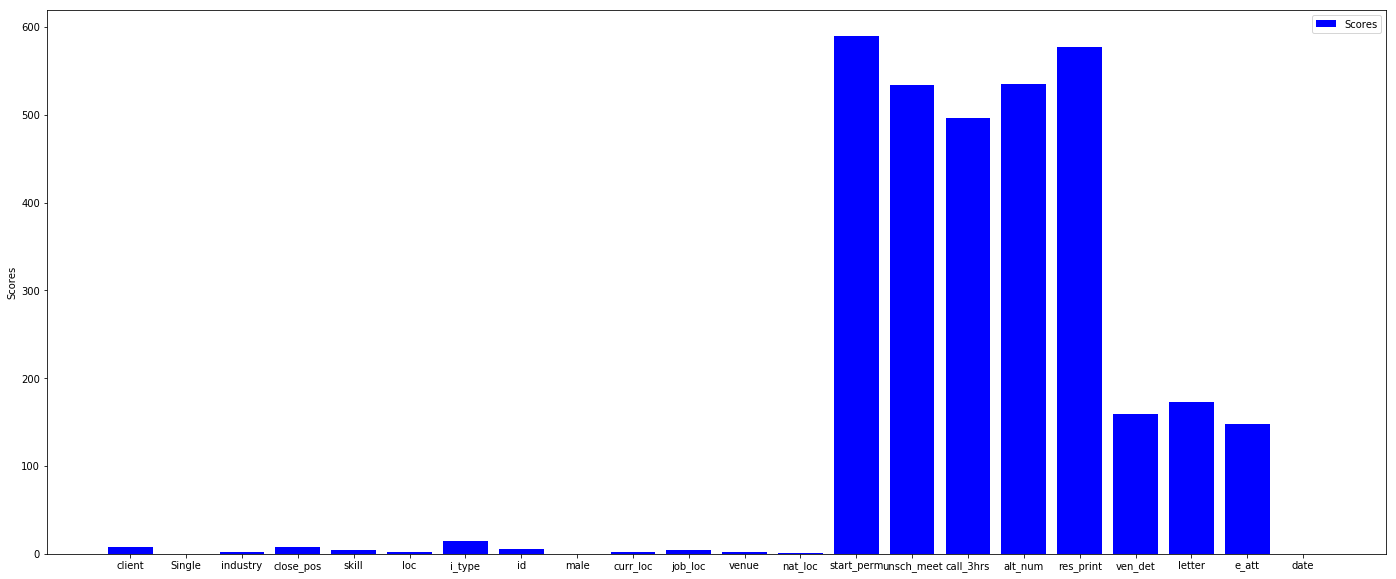

In [92]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif
x=newdf_upsampled.drop(['o_att'],axis=1)
y=newdf_upsampled['o_att']
x1=newdf.drop(['o_att'],axis=1)
y1=newdf['o_att']
bestfeatures=SelectKBest(score_func=f_classif,k=3)
fit=bestfeatures.fit(x,y)
newdfscores=pd.DataFrame(fit.scores_)
newdfcolumns=pd.DataFrame(x.columns)
feature_scores=pd.concat([newdfcolumns,newdfscores],axis=1)
feature_scores.columns=['Specs','Scores']
print("\nFor dfsam scores are:\n",feature_scores.nlargest(22,'Scores'))
bestfeatures2=SelectKBest(score_func=f_classif,k=3)
fit=bestfeatures.fit(x1,y1)
newdfscores1=pd.DataFrame(fit.scores_)
newdfcolumns1=pd.DataFrame(x.columns)
feature_scores1=pd.concat([newdfcolumns1,newdfscores1],axis=1)
feature_scores1.columns=['Specs','Scores']
import matplotlib.pyplot as plt
%matplotlib inline
L1=list(feature_scores['Scores'])
L2=list(feature_scores['Specs'])
plt.figure(figsize=(24,10))
xpos=np.arange(len(L2))
plt.xticks(xpos,L2)
plt.ylabel("Scores")
plt.bar(xpos,L1,color="blue",label="Scores")
plt.legend()

In [ ]:
#deleted the columns according to the scores

In [93]:
dfsam=newdf_upsampled.drop(['date','Single','male','nat_loc'],axis=1)
dfsam.columns

Index(['client', 'industry', 'close_pos', 'skill', 'loc', 'i_type', 'id',
       'curr_loc', 'job_loc', 'venue', 'start_perm', 'unsch_meet', 'call_3hrs',
       'alt_num', 'res_print', 'ven_det', 'letter', 'e_att', 'o_att'],
      dtype='object')

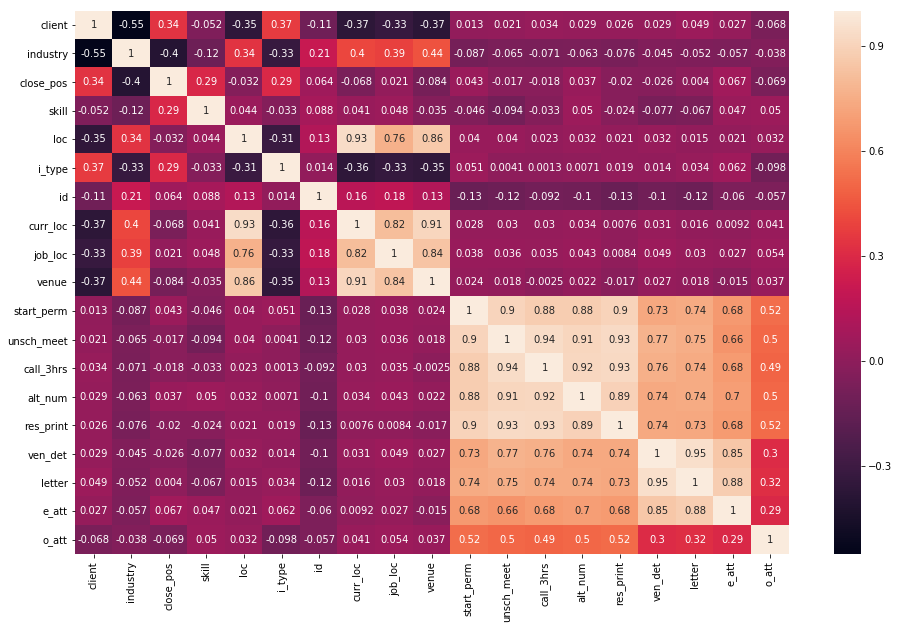

In [94]:
#heatmap
plt.figure(figsize=(16,10))
sns.heatmap(dfsam.corr(),annot=True)

In [95]:
#dataset with upsampled output column i.e. o_attendance
dfsam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1566 entries, 5 to 243
Data columns (total 19 columns):
client        1566 non-null float64
industry      1566 non-null int32
close_pos     1566 non-null int32
skill         1566 non-null int32
loc           1566 non-null int32
i_type        1566 non-null int32
id            1566 non-null int32
curr_loc      1566 non-null int32
job_loc       1566 non-null int32
venue         1566 non-null int32
start_perm    1566 non-null int32
unsch_meet    1566 non-null int32
call_3hrs     1566 non-null int32
alt_num       1566 non-null int32
res_print     1566 non-null int32
ven_det       1566 non-null int32
letter        1566 non-null int32
e_att         1566 non-null int32
o_att         1566 non-null int32
dtypes: float64(1), int32(18)
memory usage: 134.6 KB


# MODELS ON ALL THE FEATURES

In [96]:
#logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import  train_test_split
x=dfsam.drop('o_att',axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)
predictions=logmodel.predict(x_test)
predictions=logmodel.predict(x_test)


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions)*100)
print(precision_score(y_test,predictions)*100)
print(recall_score(y_test,predictions)*100)
print(f1_score(y_test,predictions)*100)
print(y_test.value_counts())
predictions=pd.Series(predictions)
print(predictions.value_counts())


[[113 115]
 [ 13 229]]
72.76595744680851
66.56976744186046
94.62809917355372
78.15699658703072
1    242
0    228
Name: o_att, dtype: int64
1    344
0    126
dtype: int64


In [97]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
x=dfsam.drop('o_att',axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
classifier_model=KNeighborsClassifier(n_neighbors=35,p=2,metric='euclidean')
classifier_model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=35, p=2,
           weights='uniform')

In [98]:
y_pred=classifier_model.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)
print(precision_score(y_test,y_pred)*100)
print(recall_score(y_test,y_pred)*100)
print(f1_score(y_test,predictions)*100)
print('Test set:\n',y_test.value_counts())
y_pred=pd.Series(y_pred)
print('Predicted set:\n',y_pred.value_counts())


[[124 104]
 [118 124]]
52.76595744680851
54.385964912280706
51.2396694214876
78.15699658703072
Test set:
 1    242
0    228
Name: o_att, dtype: int64
Predicted set:
 0    242
1    228
dtype: int64


In [99]:
#Decission Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x=dfsam.drop(['o_att'],axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
classifier_entropy=DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=3)
classifier_entropy.fit(x_train,y_train)
Y_PRED=classifier_entropy.predict(x_test)



print(classifier_entropy)
print("Test set",x_test.shape, y_test.shape)
print("Training set",x_train.shape, y_train.shape)
print(confusion_matrix(y_test,Y_PRED))
print(accuracy_score(y_test,Y_PRED)*100)
print(precision_score(y_test,Y_PRED)*100)
print(recall_score(y_test,Y_PRED)*100)
print(f1_score(y_test,Y_PRED)*100)
print('Test set:\n',y_test.value_counts())
Y_PRED=pd.Series(Y_PRED)
print('Predicted set:\n',Y_PRED.value_counts())

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')
Test set (470, 18) (470,)
Training set (1096, 18) (1096,)
[[101 127]
 [  6 236]]
71.70212765957447
65.0137741046832
97.52066115702479
78.01652892561984
Test set:
 1    242
0    228
Name: o_att, dtype: int64
Predicted set:
 1    363
0    107
dtype: int64


In [100]:
#Naive Bayes model
from sklearn.naive_bayes import GaussianNB
x=dfsam.drop(['o_att'],axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
print("Test set",x_test.shape, y_test.shape)
print("Training set",x_train.shape, y_train.shape)
model=GaussianNB()
model=model.fit(x_train,y_train)
predicted=model.predict(x_test)

Test set (470, 18) (470,)
Training set (1096, 18) (1096,)


In [101]:
print(confusion_matrix(y_test,predicted))
print(accuracy_score(y_test,predicted)*100)
print(precision_score(y_test,predicted)*100)
print(recall_score(y_test,predicted)*100)
print(f1_score(y_test,predicted)*100)
print('Test set:\n',y_test.value_counts())
predicted=pd.Series(predicted)
print('Predicted set:\n',predicted.value_counts())

[[108 120]
 [  9 233]]
72.5531914893617
66.0056657223796
96.28099173553719
78.31932773109244
Test set:
 1    242
0    228
Name: o_att, dtype: int64
Predicted set:
 1    353
0    117
dtype: int64


In [ ]:
#The abovve 4 models were created just for inference purpose

In [ ]:
#now we created 4 models based on the selected features from k=10 to k=15(forward selection)

# LOGISTIC REGRESSION MODEL FOR K=10 TO K=15

# K=10

In [101]:
x=dfsam.drop(['o_att','client','id','job_loc','skill','curr_loc','industry','venue','loc'],axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)
predictions10=logmodel.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report
print("Test set",x_test.shape, y_test.shape)
print("Training set",x_train.shape, y_train.shape)
print(confusion_matrix(y_test,predictions10))
print(accuracy_score(y_test,predictions10)*100)
print(precision_score(y_test,predictions10)*100)
print(recall_score(y_test,predictions10)*100)
print(f1_score(y_test,predictions10)*100)
print(classification_report(y_test,predictions10))
print('Test set:\n',y_test.value_counts())
predictions10=pd.Series(predictions10)
print('Predicted set:\n',predictions10.value_counts())

Test set (470, 10) (470,)
Training set (1096, 10) (1096,)
[[137  91]
 [ 44 198]]
71.27659574468085
68.5121107266436
81.81818181818183
74.57627118644068
              precision    recall  f1-score   support

           0       0.76      0.60      0.67       228
           1       0.69      0.82      0.75       242

   micro avg       0.71      0.71      0.71       470
   macro avg       0.72      0.71      0.71       470
weighted avg       0.72      0.71      0.71       470

Test set:
 1    242
0    228
Name: o_att, dtype: int64
Predicted set:
 1    289
0    181
dtype: int64


# k=11

In [102]:
x=dfsam.drop(['o_att','id','job_loc','skill','curr_loc','industry','venue','loc'],axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)
predictions=logmodel.predict(x_test)
predictions=logmodel.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report
print("Test set",x_test.shape, y_test.shape)
print("Training set",x_train.shape, y_train.shape)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions)*100)
print(precision_score(y_test,predictions)*100)
print(recall_score(y_test,predictions)*100)
print(f1_score(y_test,predictions)*100)
print(classification_report(y_test,predictions))
print('Test set:\n',y_test.value_counts())
predictions=pd.Series(predictions)
print('Predicted set:\n',predictions.value_counts())

Test set (470, 11) (470,)
Training set (1096, 11) (1096,)
[[105 123]
 [ 11 231]]
71.48936170212767
65.2542372881356
95.45454545454545
77.51677852348995
              precision    recall  f1-score   support

           0       0.91      0.46      0.61       228
           1       0.65      0.95      0.78       242

   micro avg       0.71      0.71      0.71       470
   macro avg       0.78      0.71      0.69       470
weighted avg       0.78      0.71      0.70       470

Test set:
 1    242
0    228
Name: o_att, dtype: int64
Predicted set:
 1    354
0    116
dtype: int64


# k=12

In [103]:
x=dfsam.drop(['o_att','job_loc','skill','curr_loc','industry','venue','loc'],axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)
predictions=logmodel.predict(x_test)
predictions=logmodel.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report
print("Test set",x_test.shape, y_test.shape)
print("Training set",x_train.shape, y_train.shape)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions)*100)
print(precision_score(y_test,predictions)*100)
print(recall_score(y_test,predictions)*100)
print(f1_score(y_test,predictions)*100)
print(classification_report(y_test,predictions))
print('Test set:\n',y_test.value_counts())
predictions=pd.Series(predictions)
print('Predicted set:\n',predictions.value_counts())

Test set (470, 12) (470,)
Training set (1096, 12) (1096,)
[[122 106]
 [ 29 213]]
71.27659574468085
66.77115987460816
88.01652892561982
75.93582887700535
              precision    recall  f1-score   support

           0       0.81      0.54      0.64       228
           1       0.67      0.88      0.76       242

   micro avg       0.71      0.71      0.71       470
   macro avg       0.74      0.71      0.70       470
weighted avg       0.74      0.71      0.70       470

Test set:
 1    242
0    228
Name: o_att, dtype: int64
Predicted set:
 1    319
0    151
dtype: int64


# k=13

In [104]:
x=dfsam.drop(['o_att','skill','curr_loc','industry','venue','loc'],axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)
predictions=logmodel.predict(x_test)
predictions=logmodel.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report
print("Test set",x_test.shape, y_test.shape)
print("Training set",x_train.shape, y_train.shape)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions)*100)
print(precision_score(y_test,predictions)*100)
print(recall_score(y_test,predictions)*100)
print(f1_score(y_test,predictions)*100)
print(classification_report(y_test,predictions))
print('Test set:\n',y_test.value_counts())
predictions=pd.Series(predictions)
print('Predicted set:\n',predictions.value_counts())

Test set (470, 13) (470,)
Training set (1096, 13) (1096,)
[[111 117]
 [ 23 219]]
70.2127659574468
65.17857142857143
90.49586776859503
75.77854671280278
              precision    recall  f1-score   support

           0       0.83      0.49      0.61       228
           1       0.65      0.90      0.76       242

   micro avg       0.70      0.70      0.70       470
   macro avg       0.74      0.70      0.69       470
weighted avg       0.74      0.70      0.69       470

Test set:
 1    242
0    228
Name: o_att, dtype: int64
Predicted set:
 1    336
0    134
dtype: int64


# k=14

In [105]:
x=dfsam.drop(['o_att','curr_loc','industry','venue','loc'],axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)
predictions=logmodel.predict(x_test)
predictions=logmodel.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report
print("Test set",x_test.shape, y_test.shape)
print("Training set",x_train.shape, y_train.shape)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions)*100)
print(precision_score(y_test,predictions)*100)
print(recall_score(y_test,predictions)*100)
print(f1_score(y_test,predictions)*100)
print(classification_report(y_test,predictions))
print('Test set:\n',y_test.value_counts())
predictions=pd.Series(predictions)
print('Predicted set:\n',predictions.value_counts())

Test set (470, 14) (470,)
Training set (1096, 14) (1096,)
[[110 118]
 [ 17 225]]
71.27659574468085
65.59766763848397
92.97520661157024
76.92307692307693
              precision    recall  f1-score   support

           0       0.87      0.48      0.62       228
           1       0.66      0.93      0.77       242

   micro avg       0.71      0.71      0.71       470
   macro avg       0.76      0.71      0.69       470
weighted avg       0.76      0.71      0.70       470

Test set:
 1    242
0    228
Name: o_att, dtype: int64
Predicted set:
 1    343
0    127
dtype: int64


# K=15

In [106]:
x=dfsam.drop(['o_att','industry','venue','loc'],axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)
predictions=logmodel.predict(x_test)
predictions=logmodel.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report
print("Test set",x_test.shape, y_test.shape)
print("Training set",x_train.shape, y_train.shape)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions)*100)
print(precision_score(y_test,predictions)*100)
print(recall_score(y_test,predictions)*100)
print(f1_score(y_test,predictions)*100)
print(classification_report(y_test,predictions))
print('Test set:\n',y_test.value_counts())
predictions=pd.Series(predictions)
print('Predicted set:\n',predictions.value_counts())

Test set (470, 15) (470,)
Training set (1096, 15) (1096,)
[[111 117]
 [ 23 219]]
70.2127659574468
65.17857142857143
90.49586776859503
75.77854671280278
              precision    recall  f1-score   support

           0       0.83      0.49      0.61       228
           1       0.65      0.90      0.76       242

   micro avg       0.70      0.70      0.70       470
   macro avg       0.74      0.70      0.69       470
weighted avg       0.74      0.70      0.69       470

Test set:
 1    242
0    228
Name: o_att, dtype: int64
Predicted set:
 1    336
0    134
dtype: int64


# DecisionTree models for k=10 to k=15

# K=10

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x=dfsam.drop(['o_att','client','id','job_loc','skill','curr_loc','industry','venue','loc'],axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)
classifier_entropy=DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=3)
classifier_entropy.fit(x_train,y_train)
Y_PRED10=classifier_entropy.predict(x_test)
print("Test set",x_test.shape, y_test.shape)
print("Training set",x_train.shape, y_train.shape)
print(confusion_matrix(y_test,Y_PRED10))
print(accuracy_score(y_test,Y_PRED10)*100)
print(precision_score(y_test,Y_PRED10)*100)
print(recall_score(y_test,Y_PRED10)*100)
print(f1_score(y_test,Y_PRED10)*100)
print(classification_report(y_test,Y_PRED10))
print('Test set:\n',y_test.value_counts())
Y_PRED10=pd.Series(Y_PRED10)
print('Predicted set:\n',Y_PRED10.value_counts())

Test set (470, 10) (470,)
Training set (1096, 10) (1096,)
[[107 126]
 [  2 235]]
72.76595744680851
65.09695290858726
99.15611814345992
78.59531772575252
              precision    recall  f1-score   support

           0       0.98      0.46      0.63       233
           1       0.65      0.99      0.79       237

   micro avg       0.73      0.73      0.73       470
   macro avg       0.82      0.73      0.71       470
weighted avg       0.81      0.73      0.71       470

Test set:
 1    237
0    233
Name: o_att, dtype: int64
Predicted set:
 1    361
0    109
dtype: int64


# k=11

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x=dfsam.drop(['o_att','id','job_loc','skill','curr_loc','industry','venue','loc'],axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
classifier_entropy=DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=3)
classifier_entropy.fit(x_train,y_train)
Y_PRED=classifier_entropy.predict(x_test)
print("Test set",x_test.shape, y_test.shape)
print("Training set",x_train.shape, y_train.shape)
print(confusion_matrix(y_test,Y_PRED))
print(accuracy_score(y_test,Y_PRED)*100)
print(precision_score(y_test,Y_PRED)*100)
print(recall_score(y_test,Y_PRED)*100)
print(f1_score(y_test,Y_PRED)*100)
print(classification_report(y_test,Y_PRED))
print('Test set:\n',y_test.value_counts())
Y_PRED=pd.Series(Y_PRED)
print('Predicted set:\n',Y_PRED.value_counts())

Test set (470, 11) (470,)
Training set (1096, 11) (1096,)
[[101 127]
 [  6 236]]
71.70212765957447
65.0137741046832
97.52066115702479
78.01652892561984
              precision    recall  f1-score   support

           0       0.94      0.44      0.60       228
           1       0.65      0.98      0.78       242

   micro avg       0.72      0.72      0.72       470
   macro avg       0.80      0.71      0.69       470
weighted avg       0.79      0.72      0.69       470

Test set:
 1    242
0    228
Name: o_att, dtype: int64
Predicted set:
 1    363
0    107
dtype: int64


# k=12

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x=dfsam.drop(['o_att','job_loc','skill','curr_loc','industry','venue','loc'],axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
classifier_entropy=DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=3)
classifier_entropy.fit(x_train,y_train)
Y_PRED=classifier_entropy.predict(x_test)
print("Test set",x_test.shape, y_test.shape)
print("Training set",x_train.shape, y_train.shape)
print(confusion_matrix(y_test,Y_PRED))
print(accuracy_score(y_test,Y_PRED)*100)
print(precision_score(y_test,Y_PRED)*100)
print(recall_score(y_test,Y_PRED)*100)
print(f1_score(y_test,Y_PRED)*100)
print(classification_report(y_test,Y_PRED))
print('Test set:\n',y_test.value_counts())
Y_PRED=pd.Series(Y_PRED)
print('Predicted set:\n',Y_PRED.value_counts())

Test set (470, 12) (470,)
Training set (1096, 12) (1096,)
[[101 127]
 [  6 236]]
71.70212765957447
65.0137741046832
97.52066115702479
78.01652892561984
              precision    recall  f1-score   support

           0       0.94      0.44      0.60       228
           1       0.65      0.98      0.78       242

   micro avg       0.72      0.72      0.72       470
   macro avg       0.80      0.71      0.69       470
weighted avg       0.79      0.72      0.69       470

Test set:
 1    242
0    228
Name: o_att, dtype: int64
Predicted set:
 1    363
0    107
dtype: int64


# k=13

In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x=dfsam.drop(['o_att','skill','curr_loc','industry','venue','loc'],axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
classifier_entropy=DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=3)
classifier_entropy.fit(x_train,y_train)
Y_PRED=classifier_entropy.predict(x_test)
print("Test set",x_test.shape, y_test.shape)
print("Training set",x_train.shape, y_train.shape)
print(confusion_matrix(y_test,Y_PRED))
print(accuracy_score(y_test,Y_PRED)*100)
print(precision_score(y_test,Y_PRED)*100)
print(recall_score(y_test,Y_PRED)*100)
print(f1_score(y_test,Y_PRED)*100)
print(classification_report(y_test,Y_PRED))
print('Test set:\n',y_test.value_counts())
Y_PRED=pd.Series(Y_PRED)
print('Predicted set:\n',Y_PRED.value_counts())

Test set (470, 13) (470,)
Training set (1096, 13) (1096,)
[[101 127]
 [  6 236]]
71.70212765957447
65.0137741046832
97.52066115702479
78.01652892561984
              precision    recall  f1-score   support

           0       0.94      0.44      0.60       228
           1       0.65      0.98      0.78       242

   micro avg       0.72      0.72      0.72       470
   macro avg       0.80      0.71      0.69       470
weighted avg       0.79      0.72      0.69       470

Test set:
 1    242
0    228
Name: o_att, dtype: int64
Predicted set:
 1    363
0    107
dtype: int64


# k=14

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x=dfsam.drop(['o_att','curr_loc','industry','venue','loc'],axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
classifier_entropy=DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=3)
classifier_entropy.fit(x_train,y_train)
Y_PRED=classifier_entropy.predict(x_test)
print("Test set",x_test.shape, y_test.shape)
print("Training set",x_train.shape, y_train.shape)
print(confusion_matrix(y_test,Y_PRED))
print(accuracy_score(y_test,Y_PRED)*100)
print(precision_score(y_test,Y_PRED)*100)
print(recall_score(y_test,Y_PRED)*100)
print(f1_score(y_test,Y_PRED)*100)
print(classification_report(y_test,Y_PRED))
print('Test set:\n',y_test.value_counts())
Y_PRED=pd.Series(Y_PRED)
print('Predicted set:\n',Y_PRED.value_counts())

Test set (470, 14) (470,)
Training set (1096, 14) (1096,)
[[101 127]
 [  6 236]]
71.70212765957447
65.0137741046832
97.52066115702479
78.01652892561984
              precision    recall  f1-score   support

           0       0.94      0.44      0.60       228
           1       0.65      0.98      0.78       242

   micro avg       0.72      0.72      0.72       470
   macro avg       0.80      0.71      0.69       470
weighted avg       0.79      0.72      0.69       470

Test set:
 1    242
0    228
Name: o_att, dtype: int64
Predicted set:
 1    363
0    107
dtype: int64


# k=15

In [112]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x=dfsam.drop(['o_att','industry','venue','loc'],axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
classifier_entropy=DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=3)
classifier_entropy.fit(x_train,y_train)
Y_PRED=classifier_entropy.predict(x_test)
print("Test set",x_test.shape, y_test.shape)
print("Training set",x_train.shape, y_train.shape)
print(confusion_matrix(y_test,Y_PRED))
print(accuracy_score(y_test,Y_PRED)*100)
print(precision_score(y_test,Y_PRED)*100)
print(recall_score(y_test,Y_PRED)*100)
print(f1_score(y_test,Y_PRED)*100)
print(classification_report(y_test,Y_PRED))
print('Test set:\n',y_test.value_counts())
Y_PRED=pd.Series(Y_PRED)
print('Predicted set:\n',Y_PRED.value_counts())

Test set (470, 15) (470,)
Training set (1096, 15) (1096,)
[[101 127]
 [  6 236]]
71.70212765957447
65.0137741046832
97.52066115702479
78.01652892561984
              precision    recall  f1-score   support

           0       0.94      0.44      0.60       228
           1       0.65      0.98      0.78       242

   micro avg       0.72      0.72      0.72       470
   macro avg       0.80      0.71      0.69       470
weighted avg       0.79      0.72      0.69       470

Test set:
 1    242
0    228
Name: o_att, dtype: int64
Predicted set:
 1    363
0    107
dtype: int64


# NB models for k=10 to k=15

# K=10

In [113]:
from sklearn.naive_bayes import GaussianNB
x=dfsam.drop(['o_att','client','id','job_loc','skill','curr_loc','industry','venue','loc'],axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
print("Test set",x_test.shape, y_test.shape)
print("Training set",x_train.shape, y_train.shape)
model=GaussianNB()
model=model.fit(x_train,y_train)
predicted10=model.predict(x_test)
print(confusion_matrix(y_test,predicted10))
print(accuracy_score(y_test,predicted10)*100)
print(precision_score(y_test,predicted10)*100)
print(recall_score(y_test,predicted10)*100)
print(f1_score(y_test,predicted10)*100)
print(classification_report(y_test,predicted10))
print('Test set:\n',y_test.value_counts())
predicted10=pd.Series(predicted10)
print('Predicted set:\n',predicted10.value_counts())

Test set (470, 10) (470,)
Training set (1096, 10) (1096,)
[[108 120]
 [  9 233]]
72.5531914893617
66.0056657223796
96.28099173553719
78.31932773109244
              precision    recall  f1-score   support

           0       0.92      0.47      0.63       228
           1       0.66      0.96      0.78       242

   micro avg       0.73      0.73      0.73       470
   macro avg       0.79      0.72      0.70       470
weighted avg       0.79      0.73      0.71       470

Test set:
 1    242
0    228
Name: o_att, dtype: int64
Predicted set:
 1    353
0    117
dtype: int64


# k=11

In [114]:
from sklearn.naive_bayes import GaussianNB
x=dfsam.drop(['o_att','id','job_loc','skill','curr_loc','industry','venue','loc'],axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
print("Test set",x_test.shape, y_test.shape)
print("Training set",x_train.shape, y_train.shape)
model=GaussianNB()
model=model.fit(x_train,y_train)
predicted=model.predict(x_test)
print(confusion_matrix(y_test,predicted))
print(accuracy_score(y_test,predicted)*100)
print(precision_score(y_test,predicted)*100)
print(recall_score(y_test,predicted)*100)
print(f1_score(y_test,predicted)*100)
print(classification_report(y_test,predicted))
print('Test set:\n',y_test.value_counts())
predicted=pd.Series(predicted)
print('Predicted set:\n',predicted.value_counts())

Test set (470, 11) (470,)
Training set (1096, 11) (1096,)
[[108 120]
 [  9 233]]
72.5531914893617
66.0056657223796
96.28099173553719
78.31932773109244
              precision    recall  f1-score   support

           0       0.92      0.47      0.63       228
           1       0.66      0.96      0.78       242

   micro avg       0.73      0.73      0.73       470
   macro avg       0.79      0.72      0.70       470
weighted avg       0.79      0.73      0.71       470

Test set:
 1    242
0    228
Name: o_att, dtype: int64
Predicted set:
 1    353
0    117
dtype: int64


# k=12

In [115]:
from sklearn.naive_bayes import GaussianNB
x=dfsam.drop(['o_att','job_loc','skill','curr_loc','industry','venue','loc'],axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
print("Test set",x_test.shape, y_test.shape)
print("Training set",x_train.shape, y_train.shape)
model=GaussianNB()
model=model.fit(x_train,y_train)
predicted=model.predict(x_test)
print(confusion_matrix(y_test,predicted))
print(accuracy_score(y_test,predicted)*100)
print(precision_score(y_test,predicted)*100)
print(recall_score(y_test,predicted)*100)
print(f1_score(y_test,predicted)*100)
print(classification_report(y_test,predicted))
print('Test set:\n',y_test.value_counts())
predicted=pd.Series(predicted)
print('Predicted set:\n',predicted.value_counts())

Test set (470, 12) (470,)
Training set (1096, 12) (1096,)
[[108 120]
 [  9 233]]
72.5531914893617
66.0056657223796
96.28099173553719
78.31932773109244
              precision    recall  f1-score   support

           0       0.92      0.47      0.63       228
           1       0.66      0.96      0.78       242

   micro avg       0.73      0.73      0.73       470
   macro avg       0.79      0.72      0.70       470
weighted avg       0.79      0.73      0.71       470

Test set:
 1    242
0    228
Name: o_att, dtype: int64
Predicted set:
 1    353
0    117
dtype: int64


# k=13

In [116]:
from sklearn.naive_bayes import GaussianNB
x=dfsam.drop(['o_att','skill','curr_loc','industry','venue','loc'],axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
print("Test set",x_test.shape, y_test.shape)
print("Training set",x_train.shape, y_train.shape)
model=GaussianNB()
model=model.fit(x_train,y_train)
predicted=model.predict(x_test)
print(confusion_matrix(y_test,predicted))
print(accuracy_score(y_test,predicted)*100)
print(precision_score(y_test,predicted)*100)
print(recall_score(y_test,predicted)*100)
print(f1_score(y_test,predicted)*100)
print(classification_report(y_test,predicted))
print('Test set:\n',y_test.value_counts())
predicted=pd.Series(predicted)
print('Predicted set:\n',predicted.value_counts())

Test set (470, 13) (470,)
Training set (1096, 13) (1096,)
[[108 120]
 [  9 233]]
72.5531914893617
66.0056657223796
96.28099173553719
78.31932773109244
              precision    recall  f1-score   support

           0       0.92      0.47      0.63       228
           1       0.66      0.96      0.78       242

   micro avg       0.73      0.73      0.73       470
   macro avg       0.79      0.72      0.70       470
weighted avg       0.79      0.73      0.71       470

Test set:
 1    242
0    228
Name: o_att, dtype: int64
Predicted set:
 1    353
0    117
dtype: int64


# k=14

In [117]:
from sklearn.naive_bayes import GaussianNB
x=dfsam.drop(['o_att','curr_loc','industry','venue','loc'],axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
print("Test set",x_test.shape, y_test.shape)
print("Training set",x_train.shape, y_train.shape)
model=GaussianNB()
model=model.fit(x_train,y_train)
predicted=model.predict(x_test)
print(confusion_matrix(y_test,predicted))
print(accuracy_score(y_test,predicted)*100)
print(precision_score(y_test,predicted)*100)
print(recall_score(y_test,predicted)*100)
print(f1_score(y_test,predicted)*100)
print(classification_report(y_test,predicted))
print('Test set:\n',y_test.value_counts())
predicted=pd.Series(predicted)
print('Predicted set:\n',predicted.value_counts())

Test set (470, 14) (470,)
Training set (1096, 14) (1096,)
[[108 120]
 [  9 233]]
72.5531914893617
66.0056657223796
96.28099173553719
78.31932773109244
              precision    recall  f1-score   support

           0       0.92      0.47      0.63       228
           1       0.66      0.96      0.78       242

   micro avg       0.73      0.73      0.73       470
   macro avg       0.79      0.72      0.70       470
weighted avg       0.79      0.73      0.71       470

Test set:
 1    242
0    228
Name: o_att, dtype: int64
Predicted set:
 1    353
0    117
dtype: int64


# k=15

In [118]:
from sklearn.naive_bayes import GaussianNB
x=dfsam.drop(['o_att','industry','venue','loc'],axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
print("Test set",x_test.shape, y_test.shape)
print("Training set",x_train.shape, y_train.shape)
model=GaussianNB()
model=model.fit(x_train,y_train)
predicted=model.predict(x_test)
print(confusion_matrix(y_test,predicted))
print(accuracy_score(y_test,predicted)*100)
print(precision_score(y_test,predicted)*100)
print(recall_score(y_test,predicted)*100)
print(f1_score(y_test,predicted)*100)
print(classification_report(y_test,predicted))
print('Test set:\n',y_test.value_counts())
predicted=pd.Series(predicted)
print('Predicted set:\n',predicted.value_counts())

Test set (470, 15) (470,)
Training set (1096, 15) (1096,)
[[108 120]
 [  9 233]]
72.5531914893617
66.0056657223796
96.28099173553719
78.31932773109244
              precision    recall  f1-score   support

           0       0.92      0.47      0.63       228
           1       0.66      0.96      0.78       242

   micro avg       0.73      0.73      0.73       470
   macro avg       0.79      0.72      0.70       470
weighted avg       0.79      0.73      0.71       470

Test set:
 1    242
0    228
Name: o_att, dtype: int64
Predicted set:
 1    353
0    117
dtype: int64


# KNN Mode for k=10 to k=15

# k=10

In [119]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
x=dfsam.drop(['o_att','client','id','job_loc','skill','curr_loc','industry','venue','loc'],axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
classifier_model=KNeighborsClassifier(n_neighbors=35,p=2,metric='euclidean')
classifier_model.fit(x_train,y_train)
y_pred10=classifier_model.predict(x_test)
print(confusion_matrix(y_test,y_pred10))
print(accuracy_score(y_test,y_pred10)*100)
print(precision_score(y_test,y_pred10)*100)
print(recall_score(y_test,y_pred10)*100)
print(f1_score(y_test,y_pred10)*100)
print(classification_report(y_test,y_pred10))
print('Test set:\n',y_test.value_counts())
y_pred10=pd.Series(y_pred10)
print('Predicted set:\n',y_pred10.value_counts())

[[ 96 132]
 [  2 240]]
71.48936170212767
64.51612903225806
99.17355371900827
78.1758957654723
              precision    recall  f1-score   support

           0       0.98      0.42      0.59       228
           1       0.65      0.99      0.78       242

   micro avg       0.71      0.71      0.71       470
   macro avg       0.81      0.71      0.69       470
weighted avg       0.81      0.71      0.69       470

Test set:
 1    242
0    228
Name: o_att, dtype: int64
Predicted set:
 1    372
0     98
dtype: int64


# k=11

In [120]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
x=dfsam.drop(['o_att','id','job_loc','skill','curr_loc','industry','venue','loc'],axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
classifier_model=KNeighborsClassifier(n_neighbors=35,p=2,metric='euclidean')
classifier_model.fit(x_train,y_train)
y_pred=classifier_model.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)
print(precision_score(y_test,y_pred)*100)
print(recall_score(y_test,y_pred)*100)
print(f1_score(y_test,predicted)*100)
print(classification_report(y_test,y_pred))
print('Test set:\n',y_test.value_counts())
y_pred=pd.Series(y_pred)
print('Predicted set:\n',y_pred.value_counts())

[[113 115]
 [ 40 202]]
67.02127659574468
63.722397476340696
83.47107438016529
78.31932773109244
              precision    recall  f1-score   support

           0       0.74      0.50      0.59       228
           1       0.64      0.83      0.72       242

   micro avg       0.67      0.67      0.67       470
   macro avg       0.69      0.67      0.66       470
weighted avg       0.69      0.67      0.66       470

Test set:
 1    242
0    228
Name: o_att, dtype: int64
Predicted set:
 1    317
0    153
dtype: int64


# k=12

In [121]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
x=dfsam.drop(['o_att','job_loc','skill','curr_loc','industry','venue','loc'],axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
classifier_model=KNeighborsClassifier(n_neighbors=35,p=2,metric='euclidean')
classifier_model.fit(x_train,y_train)
y_pred=classifier_model.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)
print(precision_score(y_test,y_pred)*100)
print(recall_score(y_test,y_pred)*100)
print(f1_score(y_test,predicted)*100)
print(classification_report(y_test,y_pred))
print('Test set:\n',y_test.value_counts())
y_pred=pd.Series(y_pred)
print('Predicted set:\n',y_pred.value_counts())

[[124 104]
 [119 123]]
52.55319148936171
54.18502202643172
50.82644628099173
78.31932773109244
              precision    recall  f1-score   support

           0       0.51      0.54      0.53       228
           1       0.54      0.51      0.52       242

   micro avg       0.53      0.53      0.53       470
   macro avg       0.53      0.53      0.53       470
weighted avg       0.53      0.53      0.53       470

Test set:
 1    242
0    228
Name: o_att, dtype: int64
Predicted set:
 0    243
1    227
dtype: int64


# k=13

In [122]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
x=dfsam.drop(['o_att','skill','curr_loc','industry','venue','loc'],axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
classifier_model=KNeighborsClassifier(n_neighbors=35,p=2,metric='euclidean')
classifier_model.fit(x_train,y_train)
y_pred=classifier_model.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)
print(precision_score(y_test,y_pred)*100)
print(recall_score(y_test,y_pred)*100)
print(f1_score(y_test,predicted)*100)
print(classification_report(y_test,y_pred))
print('Test set:\n',y_test.value_counts())
y_pred=pd.Series(y_pred)
print('Predicted set:\n',y_pred.value_counts())

[[124 104]
 [119 123]]
52.55319148936171
54.18502202643172
50.82644628099173
78.31932773109244
              precision    recall  f1-score   support

           0       0.51      0.54      0.53       228
           1       0.54      0.51      0.52       242

   micro avg       0.53      0.53      0.53       470
   macro avg       0.53      0.53      0.53       470
weighted avg       0.53      0.53      0.53       470

Test set:
 1    242
0    228
Name: o_att, dtype: int64
Predicted set:
 0    243
1    227
dtype: int64


# k=14

In [123]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
x=dfsam.drop(['o_att','curr_loc','industry','venue','loc'],axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
classifier_model=KNeighborsClassifier(n_neighbors=35,p=2,metric='euclidean')
classifier_model.fit(x_train,y_train)
y_pred=classifier_model.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)
print(precision_score(y_test,y_pred)*100)
print(recall_score(y_test,y_pred)*100)
print(f1_score(y_test,predicted)*100)
print(classification_report(y_test,y_pred))
print('Test set:\n',y_test.value_counts())
y_pred=pd.Series(y_pred)
print('Predicted set:\n',y_pred.value_counts())

[[124 104]
 [119 123]]
52.55319148936171
54.18502202643172
50.82644628099173
78.31932773109244
              precision    recall  f1-score   support

           0       0.51      0.54      0.53       228
           1       0.54      0.51      0.52       242

   micro avg       0.53      0.53      0.53       470
   macro avg       0.53      0.53      0.53       470
weighted avg       0.53      0.53      0.53       470

Test set:
 1    242
0    228
Name: o_att, dtype: int64
Predicted set:
 0    243
1    227
dtype: int64


# k=15

In [124]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
x=dfsam.drop(['o_att','industry','venue','loc'],axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
classifier_model=KNeighborsClassifier(n_neighbors=35,p=2,metric='euclidean')
classifier_model.fit(x_train,y_train)
y_pred=classifier_model.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)
print(precision_score(y_test,y_pred)*100)
print(recall_score(y_test,y_pred)*100)
print(f1_score(y_test,predicted)*100)
print(classification_report(y_test,y_pred))
print('Test set:\n',y_test.value_counts())
y_pred=pd.Series(y_pred)
print('Predicted set:\n',y_pred.value_counts())

[[124 104]
 [118 124]]
52.76595744680851
54.385964912280706
51.2396694214876
78.31932773109244
              precision    recall  f1-score   support

           0       0.51      0.54      0.53       228
           1       0.54      0.51      0.53       242

   micro avg       0.53      0.53      0.53       470
   macro avg       0.53      0.53      0.53       470
weighted avg       0.53      0.53      0.53       470

Test set:
 1    242
0    228
Name: o_att, dtype: int64
Predicted set:
 0    242
1    228
dtype: int64


# Ensemble learning using VOTING from k=10 to k=15

In [125]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
x=dfsam.drop(['o_att','client','id','job_loc','skill','curr_loc','industry','venue','loc'],axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
seed=7
kfold=model_selection.KFold(n_splits=10,random_state=100)
estimators=[]
logrec=LogisticRegression()
logrec.fit(x_train,y_train)
estimators.append(('logistic',logrec))
dectree=DecisionTreeClassifier()
dectree.fit(x_train,y_train)
estimators.append(('decisiontree',dectree))
kneigh=KNeighborsClassifier(n_neighbors=35,p=2,metric='euclidean')
logrec.fit(x_train,y_train)
estimators.append(('knearestneighbour',kneigh))
ganb=GaussianNB()
estimators.append(('naivebayesgauss',ganb))
ensemble=VotingClassifier(estimators)
results=model_selection.cross_val_score(ensemble,x_test,y_test,cv=kfold)
print(results)
print(results.mean())

[0.74468085 0.78723404 0.61702128 0.68085106 0.65957447 0.65957447
 0.68085106 0.76595745 0.68085106 0.68085106]
0.6957446808510638


In [126]:
r2=pd.DataFrame(results)

In [127]:
r2

,0
0,0.744681
1,0.787234
2,0.617021
3,0.680851
4,0.659574
5,0.659574
6,0.680851
7,0.765957
8,0.680851
9,0.680851


In [132]:
#MODELS FOR k=9 to k=6
feature_scores.nlargest(21,'Scores')

,Specs,Scores
13,start_perm,589.430189
17,res_print,576.921539
16,alt_num,534.876330
14,unsch_meet,533.431721
15,call_3hrs,495.862565
19,letter,172.597530
18,ven_det,159.292560
20,e_att,147.327398
6,i_type,15.046541
3,close_pos,7.454473


# KNN Models For K=9 to K=7

# K=9

In [133]:
#KNN
#KNN
from sklearn.neighbors import KNeighborsClassifier
x=dfsam.drop(['o_att','close_pos','client','id','job_loc','skill','curr_loc','industry','venue','loc'],axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
classifier_model=KNeighborsClassifier(n_neighbors=35,p=2,metric='euclidean')
classifier_model.fit(x_train,y_train)
y_pred10=classifier_model.predict(x_test)
print(confusion_matrix(y_test,y_pred10))
print(accuracy_score(y_test,y_pred10)*100)
print(precision_score(y_test,y_pred10)*100)
print(recall_score(y_test,y_pred10)*100)
print(f1_score(y_test,y_pred10)*100)
print(classification_report(y_test,y_pred10))
print('Test set:\n',y_test.value_counts())
y_pred10=pd.Series(y_pred10)
print('Predicted set:\n',y_pred10.value_counts())

[[102 126]
 [  5 237]]
72.12765957446808
65.28925619834712
97.93388429752066
78.34710743801654
              precision    recall  f1-score   support

           0       0.95      0.45      0.61       228
           1       0.65      0.98      0.78       242

   micro avg       0.72      0.72      0.72       470
   macro avg       0.80      0.71      0.70       470
weighted avg       0.80      0.72      0.70       470

Test set:
 1    242
0    228
Name: o_att, dtype: int64
Predicted set:
 1    363
0    107
dtype: int64


# K=8

In [134]:
#KNN
#KNN
from sklearn.neighbors import KNeighborsClassifier
x=dfsam.drop(['o_att','i_type','close_pos','client','id','job_loc','skill','curr_loc','industry','venue','loc'],axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
classifier_model=KNeighborsClassifier(n_neighbors=35,p=2,metric='euclidean')
classifier_model.fit(x_train,y_train)
y_pred10=classifier_model.predict(x_test)
print(confusion_matrix(y_test,y_pred10))
print(accuracy_score(y_test,y_pred10)*100)
print(precision_score(y_test,y_pred10)*100)
print(recall_score(y_test,y_pred10)*100)
print(f1_score(y_test,y_pred10)*100)
print(classification_report(y_test,y_pred10))
print('Test set:\n',y_test.value_counts())
y_pred10=pd.Series(y_pred10)
print('Predicted set:\n',y_pred10.value_counts())

[[100 128]
 [  6 236]]
71.48936170212767
64.83516483516483
97.52066115702479
77.88778877887789
              precision    recall  f1-score   support

           0       0.94      0.44      0.60       228
           1       0.65      0.98      0.78       242

   micro avg       0.71      0.71      0.71       470
   macro avg       0.80      0.71      0.69       470
weighted avg       0.79      0.71      0.69       470

Test set:
 1    242
0    228
Name: o_att, dtype: int64
Predicted set:
 1    364
0    106
dtype: int64


# K=7

In [135]:
from sklearn.neighbors import KNeighborsClassifier
x=dfsam.drop(['o_att','ven_det','i_type','close_pos','client','id','job_loc','skill','curr_loc','industry','venue','loc'],axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
classifier_model=KNeighborsClassifier(n_neighbors=35,p=2,metric='euclidean')
classifier_model.fit(x_train,y_train)
y_pred10=classifier_model.predict(x_test)
print(confusion_matrix(y_test,y_pred10))
print(accuracy_score(y_test,y_pred10)*100)
print(precision_score(y_test,y_pred10)*100)
print(recall_score(y_test,y_pred10)*100)
print(f1_score(y_test,y_pred10)*100)
print(classification_report(y_test,y_pred10))
print('Test set:\n',y_test.value_counts())
y_pred10=pd.Series(y_pred10)
print('Predicted set:\n',y_pred10.value_counts())

[[100 128]
 [  2 240]]
72.3404255319149
65.21739130434783
99.17355371900827
78.68852459016395
              precision    recall  f1-score   support

           0       0.98      0.44      0.61       228
           1       0.65      0.99      0.79       242

   micro avg       0.72      0.72      0.72       470
   macro avg       0.82      0.72      0.70       470
weighted avg       0.81      0.72      0.70       470

Test set:
 1    242
0    228
Name: o_att, dtype: int64
Predicted set:
 1    368
0    102
dtype: int64


# NB models for K=9 to K=6

# K=9

In [141]:
from sklearn.naive_bayes import GaussianNB
x=dfsam.drop(['o_att','close_pos','client','id','job_loc','skill','curr_loc','industry','venue','loc'],axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
print("Test set",x_test.shape, y_test.shape)
print("Training set",x_train.shape, y_train.shape)
model=GaussianNB()
model=model.fit(x_train,y_train)
predicted10=model.predict(x_test)
print(confusion_matrix(y_test,predicted10))
print(accuracy_score(y_test,predicted10)*100)
print(precision_score(y_test,predicted10)*100)
print(recall_score(y_test,predicted10)*100)
print(f1_score(y_test,predicted10)*100)
print(classification_report(y_test,predicted10))
print('Test set:\n',y_test.value_counts())
predicted10=pd.Series(predicted10)
print('Predicted set:\n',predicted10.value_counts())

Test set (470, 9) (470,)
Training set (1096, 9) (1096,)
[[108 120]
 [  9 233]]
72.5531914893617
66.0056657223796
96.28099173553719
78.31932773109244
              precision    recall  f1-score   support

           0       0.92      0.47      0.63       228
           1       0.66      0.96      0.78       242

   micro avg       0.73      0.73      0.73       470
   macro avg       0.79      0.72      0.70       470
weighted avg       0.79      0.73      0.71       470

Test set:
 1    242
0    228
Name: o_att, dtype: int64
Predicted set:
 1    353
0    117
dtype: int64


# K=8

In [142]:
from sklearn.naive_bayes import GaussianNB
x=dfsam.drop(['o_att','i_type','close_pos','client','id','job_loc','skill','curr_loc','industry','venue','loc'],axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
print("Test set",x_test.shape, y_test.shape)
print("Training set",x_train.shape, y_train.shape)
model=GaussianNB()
model=model.fit(x_train,y_train)
predicted10=model.predict(x_test)
print(confusion_matrix(y_test,predicted10))
print(accuracy_score(y_test,predicted10)*100)
print(precision_score(y_test,predicted10)*100)
print(recall_score(y_test,predicted10)*100)
print(f1_score(y_test,predicted10)*100)
print(classification_report(y_test,predicted10))
print('Test set:\n',y_test.value_counts())
predicted10=pd.Series(predicted10)
print('Predicted set:\n',predicted10.value_counts())

Test set (470, 8) (470,)
Training set (1096, 8) (1096,)
[[108 120]
 [  9 233]]
72.5531914893617
66.0056657223796
96.28099173553719
78.31932773109244
              precision    recall  f1-score   support

           0       0.92      0.47      0.63       228
           1       0.66      0.96      0.78       242

   micro avg       0.73      0.73      0.73       470
   macro avg       0.79      0.72      0.70       470
weighted avg       0.79      0.73      0.71       470

Test set:
 1    242
0    228
Name: o_att, dtype: int64
Predicted set:
 1    353
0    117
dtype: int64


# K=7

In [143]:
from sklearn.naive_bayes import GaussianNB
x=dfsam.drop(['o_att','ven_det','i_type','close_pos','client','id','job_loc','skill','curr_loc','industry','venue','loc'],axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
print("Test set",x_test.shape, y_test.shape)
print("Training set",x_train.shape, y_train.shape)
model=GaussianNB()
model=model.fit(x_train,y_train)
predicted10=model.predict(x_test)
print(confusion_matrix(y_test,predicted10))
print(accuracy_score(y_test,predicted10)*100)
print(precision_score(y_test,predicted10)*100)
print(recall_score(y_test,predicted10)*100)
print(f1_score(y_test,predicted10)*100)
print(classification_report(y_test,predicted10))
print('Test set:\n',y_test.value_counts())
predicted10=pd.Series(predicted10)
print('Predicted set:\n',predicted10.value_counts())

Test set (470, 7) (470,)
Training set (1096, 7) (1096,)
[[108 120]
 [  9 233]]
72.5531914893617
66.0056657223796
96.28099173553719
78.31932773109244
              precision    recall  f1-score   support

           0       0.92      0.47      0.63       228
           1       0.66      0.96      0.78       242

   micro avg       0.73      0.73      0.73       470
   macro avg       0.79      0.72      0.70       470
weighted avg       0.79      0.73      0.71       470

Test set:
 1    242
0    228
Name: o_att, dtype: int64
Predicted set:
 1    353
0    117
dtype: int64


# DECISION TREE Models for K=9 to K=6

# K=9

In [147]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x=dfsam.drop(['o_att','close_pos','client','id','job_loc','skill','curr_loc','industry','venue','loc'],axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)
classifier_entropy=DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=3)
classifier_entropy.fit(x_train,y_train)
Y_PRED10=classifier_entropy.predict(x_test)
print("Test set",x_test.shape, y_test.shape)
print("Training set",x_train.shape, y_train.shape)
print(confusion_matrix(y_test,Y_PRED10))
print(accuracy_score(y_test,Y_PRED10)*100)
print(precision_score(y_test,Y_PRED10)*100)
print(recall_score(y_test,Y_PRED10)*100)
print(f1_score(y_test,Y_PRED10)*100)
print(classification_report(y_test,Y_PRED10))
print('Test set:\n',y_test.value_counts())
Y_PRED10=pd.Series(Y_PRED10)
print('Predicted set:\n',Y_PRED10.value_counts())

Test set (470, 9) (470,)
Training set (1096, 9) (1096,)
[[107 126]
 [  2 235]]
72.76595744680851
65.09695290858726
99.15611814345992
78.59531772575252
              precision    recall  f1-score   support

           0       0.98      0.46      0.63       233
           1       0.65      0.99      0.79       237

   micro avg       0.73      0.73      0.73       470
   macro avg       0.82      0.73      0.71       470
weighted avg       0.81      0.73      0.71       470

Test set:
 1    237
0    233
Name: o_att, dtype: int64
Predicted set:
 1    361
0    109
dtype: int64


# K=8

In [148]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x=dfsam.drop(['o_att','i_type','close_pos','client','id','job_loc','skill','curr_loc','industry','venue','loc'],axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)
classifier_entropy=DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=3)
classifier_entropy.fit(x_train,y_train)
Y_PRED10=classifier_entropy.predict(x_test)
print("Test set",x_test.shape, y_test.shape)
print("Training set",x_train.shape, y_train.shape)
print(confusion_matrix(y_test,Y_PRED10))
print(accuracy_score(y_test,Y_PRED10)*100)
print(precision_score(y_test,Y_PRED10)*100)
print(recall_score(y_test,Y_PRED10)*100)
print(f1_score(y_test,Y_PRED10)*100)
print(classification_report(y_test,Y_PRED10))
print('Test set:\n',y_test.value_counts())
Y_PRED10=pd.Series(Y_PRED10)
print('Predicted set:\n',Y_PRED10.value_counts())

Test set (470, 8) (470,)
Training set (1096, 8) (1096,)
[[107 126]
 [  2 235]]
72.76595744680851
65.09695290858726
99.15611814345992
78.59531772575252
              precision    recall  f1-score   support

           0       0.98      0.46      0.63       233
           1       0.65      0.99      0.79       237

   micro avg       0.73      0.73      0.73       470
   macro avg       0.82      0.73      0.71       470
weighted avg       0.81      0.73      0.71       470

Test set:
 1    237
0    233
Name: o_att, dtype: int64
Predicted set:
 1    361
0    109
dtype: int64


# K=7

In [149]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x=dfsam.drop(['o_att','ven_det','i_type','close_pos','client','id','job_loc','skill','curr_loc','industry','venue','loc'],axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)
classifier_entropy=DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=3)
classifier_entropy.fit(x_train,y_train)
Y_PRED10=classifier_entropy.predict(x_test)
print("Test set",x_test.shape, y_test.shape)
print("Training set",x_train.shape, y_train.shape)
print(confusion_matrix(y_test,Y_PRED10))
print(accuracy_score(y_test,Y_PRED10)*100)
print(precision_score(y_test,Y_PRED10)*100)
print(recall_score(y_test,Y_PRED10)*100)
print(f1_score(y_test,Y_PRED10)*100)
print(classification_report(y_test,Y_PRED10))
print('Test set:\n',y_test.value_counts())
Y_PRED10=pd.Series(Y_PRED10)
print('Predicted set:\n',Y_PRED10.value_counts())

Test set (470, 7) (470,)
Training set (1096, 7) (1096,)
[[104 129]
 [  3 234]]
71.91489361702128
64.46280991735537
98.73417721518987
77.99999999999999
              precision    recall  f1-score   support

           0       0.97      0.45      0.61       233
           1       0.64      0.99      0.78       237

   micro avg       0.72      0.72      0.72       470
   macro avg       0.81      0.72      0.70       470
weighted avg       0.81      0.72      0.70       470

Test set:
 1    237
0    233
Name: o_att, dtype: int64
Predicted set:
 1    363
0    107
dtype: int64


# Logistic regression

# K=9

In [153]:
x=dfsam.drop(['o_att','close_pos','client','id','job_loc','skill','curr_loc','industry','venue','loc'],axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)
predictions10=logmodel.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report
print("Test set",x_test.shape, y_test.shape)
print("Training set",x_train.shape, y_train.shape)
print(confusion_matrix(y_test,predictions10))
print(accuracy_score(y_test,predictions10)*100)
print(precision_score(y_test,predictions10)*100)
print(recall_score(y_test,predictions10)*100)
print(f1_score(y_test,predictions10)*100)
print(classification_report(y_test,predictions10))
print('Test set:\n',y_test.value_counts())
predictions10=pd.Series(predictions10)
print('Predicted set:\n',predictions10.value_counts())

Test set (470, 9) (470,)
Training set (1096, 9) (1096,)
[[137  91]
 [ 38 204]]
72.5531914893617
69.15254237288136
84.29752066115702
75.97765363128491
              precision    recall  f1-score   support

           0       0.78      0.60      0.68       228
           1       0.69      0.84      0.76       242

   micro avg       0.73      0.73      0.73       470
   macro avg       0.74      0.72      0.72       470
weighted avg       0.74      0.73      0.72       470

Test set:
 1    242
0    228
Name: o_att, dtype: int64
Predicted set:
 1    295
0    175
dtype: int64


# K=8

In [154]:
x=dfsam.drop(['o_att','i_type','close_pos','client','id','job_loc','skill','curr_loc','industry','venue','loc'],axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)
predictions10=logmodel.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report
print("Test set",x_test.shape, y_test.shape)
print("Training set",x_train.shape, y_train.shape)
print(confusion_matrix(y_test,predictions10))
print(accuracy_score(y_test,predictions10)*100)
print(precision_score(y_test,predictions10)*100)
print(recall_score(y_test,predictions10)*100)
print(f1_score(y_test,predictions10)*100)
print(classification_report(y_test,predictions10))
print('Test set:\n',y_test.value_counts())
predictions10=pd.Series(predictions10)
print('Predicted set:\n',predictions10.value_counts())

Test set (470, 8) (470,)
Training set (1096, 8) (1096,)
[[104 124]
 [  5 237]]
72.5531914893617
65.65096952908587
97.93388429752066
78.60696517412934
              precision    recall  f1-score   support

           0       0.95      0.46      0.62       228
           1       0.66      0.98      0.79       242

   micro avg       0.73      0.73      0.73       470
   macro avg       0.81      0.72      0.70       470
weighted avg       0.80      0.73      0.70       470

Test set:
 1    242
0    228
Name: o_att, dtype: int64
Predicted set:
 1    361
0    109
dtype: int64


# K=7

In [155]:
x=dfsam.drop(['o_att','ven_det','i_type','close_pos','client','id','job_loc','skill','curr_loc','industry','venue','loc'],axis=1)
y=dfsam['o_att']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)
predictions10=logmodel.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report
print("Test set",x_test.shape, y_test.shape)
print("Training set",x_train.shape, y_train.shape)
print(confusion_matrix(y_test,predictions10))
print(accuracy_score(y_test,predictions10)*100)
print(precision_score(y_test,predictions10)*100)
print(recall_score(y_test,predictions10)*100)
print(f1_score(y_test,predictions10)*100)
print(classification_report(y_test,predictions10))
print('Test set:\n',y_test.value_counts())
predictions10=pd.Series(predictions10)
print('Predicted set:\n',predictions10.value_counts())

Test set (470, 7) (470,)
Training set (1096, 7) (1096,)
[[104 124]
 [  5 237]]
72.5531914893617
65.65096952908587
97.93388429752066
78.60696517412934
              precision    recall  f1-score   support

           0       0.95      0.46      0.62       228
           1       0.66      0.98      0.79       242

   micro avg       0.73      0.73      0.73       470
   macro avg       0.81      0.72      0.70       470
weighted avg       0.80      0.73      0.70       470

Test set:
 1    242
0    228
Name: o_att, dtype: int64
Predicted set:
 1    361
0    109
dtype: int64


# Ensemble Learning using VOTING for K=9 to K=7

In [158]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
x=dfsam.drop(['o_att','ven_det','i_type','close_pos','client','id','job_loc','skill','curr_loc','industry','venue','loc'],axis=1)
y=dfsam['o_att']
seed=100
kfold=model_selection.KFold(n_splits=50,random_state=100)
estimators=[]
logrec=LogisticRegression()
estimators.append(('logistic',logrec))
dectree=DecisionTreeClassifier()
estimators.append(('decisiontree',dectree))
kneigh=KNeighborsClassifier(n_neighbors=35,p=2,metric='euclidean')
estimators.append(('knearestneighbour',kneigh))
ganb=GaussianNB()
estimators.append(('naivebayesgauss',ganb))
ensemble=VotingClassifier(estimators)
results=model_selection.cross_val_score(ensemble,x,y,cv=kfold)
print(results)
print(results.mean())

[1.         1.         0.96875    1.         1.         0.96875
 0.90625    0.9375     0.96875    1.         1.         0.9375
 0.96875    1.         1.         0.96875    1.         0.90322581
 1.         1.         0.93548387 1.         1.         1.
 0.87096774 0.64516129 0.41935484 0.38709677 0.61290323 0.41935484
 0.4516129  0.41935484 0.4516129  0.70967742 0.41935484 0.58064516
 0.35483871 0.41935484 0.67741935 0.48387097 0.41935484 0.5483871
 0.4516129  0.4516129  0.4516129  0.4516129  0.58064516 0.5483871
 0.4516129  0.67741935]
0.7363709677419356
